In [1]:
import os
os.add_dll_directory('C:\\Program Files\\IBM\\SQLLIB\\BIN')
# conectar a la base de datos IBM Db2
import ibm_db

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from queries import get_gpa_novatos

In [4]:
# Importar librerías adicionales para EDA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
list_names_files = glob.glob("data/materias/all_*")
df_complete = pd.DataFrame()

In [7]:
df_materias = pd.read_csv("data/materias/dificultad_materia.csv")

In [8]:
for file in list_names_files:
    print("file", file)
    split_file = file.split("_")
    termino = split_file[2].split(".")[0]
    if termino == "3S":
        continue
    
    df = pd.read_csv(file)

    df["anio"] = split_file[1]
    df["termino"] = termino
    if not("MATERIA" in df.keys()):
        df = pd.merge(df, df_materias[["CODIGOMATERIA", "MATERIA"]], left_on="COD_MATERIA_ACAD_MO", right_on="CODIGOMATERIA")

    df_complete = pd.concat([df_complete, df], ignore_index=True)

file data/materias\all_2020_1S.csv
file data/materias\all_2020_2S.csv
file data/materias\all_2021_1S.csv
file data/materias\all_2021_2S.csv
file data/materias\all_2022_1S.csv
file data/materias\all_2022_2S.csv
file data/materias\all_2023_1S.csv
file data/materias\all_2023_2S.csv
file data/materias\all_2024_1S.csv
file data/materias\all_2024_2S.csv
file data/materias\all_2025_1S.csv
file data/materias\all_2025_2S.csv


## Estadistica

In [9]:
df_complete.shape

(366900, 30)

In [10]:
df_complete["COD_ESTUDIANTE"] = df_complete["COD_ESTUDIANTE"].astype(str)
# change type of df_complete["anio"] to int
df_complete["anio"] = df_complete["anio"].astype(int)
df_complete["termino"] = df_complete["termino"].astype("category")

In [11]:
df_complete.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,promedio_general,CODIGOMATERIA,MATERIA,anio,termino,PROMEDIO_GENERAL
0,201160178,ACUG1035,AP,1,87,93,"9,00","7,90",53.0,59.0,64.0,"6,83",47.0,"7,06",17.0,N,"5,14","4,25","5,35",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,NaN
1,201310353,ACUG1035,AP,1,85,89,"8,70","7,90",59.0,61.0,74.0,"7,48",51.0,"7,94",14.0,S,"4,16","5,20","5,15",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,NaN
2,201313869,ACUG1035,AP,1,86,89,"8,75","7,90",59.0,56.0,67.0,"6,97",50.0,"7,45",13.0,S,"4,27","4,30","4,80",0,1,1,0,1,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,NaN
3,201507649,ACUG1035,AP,1,83,93,"8,80","7,90",49.0,65.0,74.0,"7,73",47.0,"7,93",11.0,N,"3,01",NaN,NaN,0,0,2,2,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,NaN
4,201607884,ACUG1035,AP,1,95,95,"9,50","7,90",39.0,72.0,77.0,"8,02",39.0,"8,02",8.0,N,NaN,NaN,NaN,0,1,1,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,NaN


In [12]:
df_complete["CANT_ACTUAL_MAT_TOMADAS"] = df_complete["MUY_FACIL"] + df_complete["FACIL"] + df_complete["MODERADA"] + df_complete["DIFICIL"] + df_complete["MUY_DIFICIL"]

In [13]:
# texto en la columna COD_MATERIA_ACAD_MO
df_complete[df_complete["COD_MATERIA_ACAD_MO"].str.contains("ADM")]["COD_MATERIA_ACAD_MO"].shape

(18188,)

In [14]:
df_complete = df_complete[~df_complete["COD_MATERIA_ACAD_MO"].str.contains("ADM")]
df_complete.shape

(348712, 31)

In [15]:
df_complete["anio"].value_counts()

anio
2020    65875
2021    60134
2025    59512
2022    54951
2024    54436
2023    53804
Name: count, dtype: int64

In [16]:
df_complete["termino"].value_counts()

termino
1S    175568
2S    173144
Name: count, dtype: int64

In [17]:
df_complete.groupby(["anio", "termino"])["termino"].value_counts()

anio  termino
2020  1S         33905
      2S         31970
2021  1S         30847
      2S         29287
2022  1S         27640
      2S         27311
2023  1S         26929
      2S         26875
2024  1S         27344
      2S         27092
2025  1S         28903
      2S         30609
Name: count, dtype: int64

Datos agrupados por año y término:
    anio termino  count
0   2020      1S  33905
1   2020      2S  31970
2   2021      1S  30847
3   2021      2S  29287
4   2022      1S  27640
5   2022      2S  27311
6   2023      1S  26929
7   2023      2S  26875
8   2024      1S  27344
9   2024      2S  27092
10  2025      1S  28903
11  2025      2S  30609

Tabla pivot:
termino     1S     2S
anio                 
2020     33905  31970
2021     30847  29287
2022     27640  27311
2023     26929  26875
2024     27344  27092
2025     28903  30609


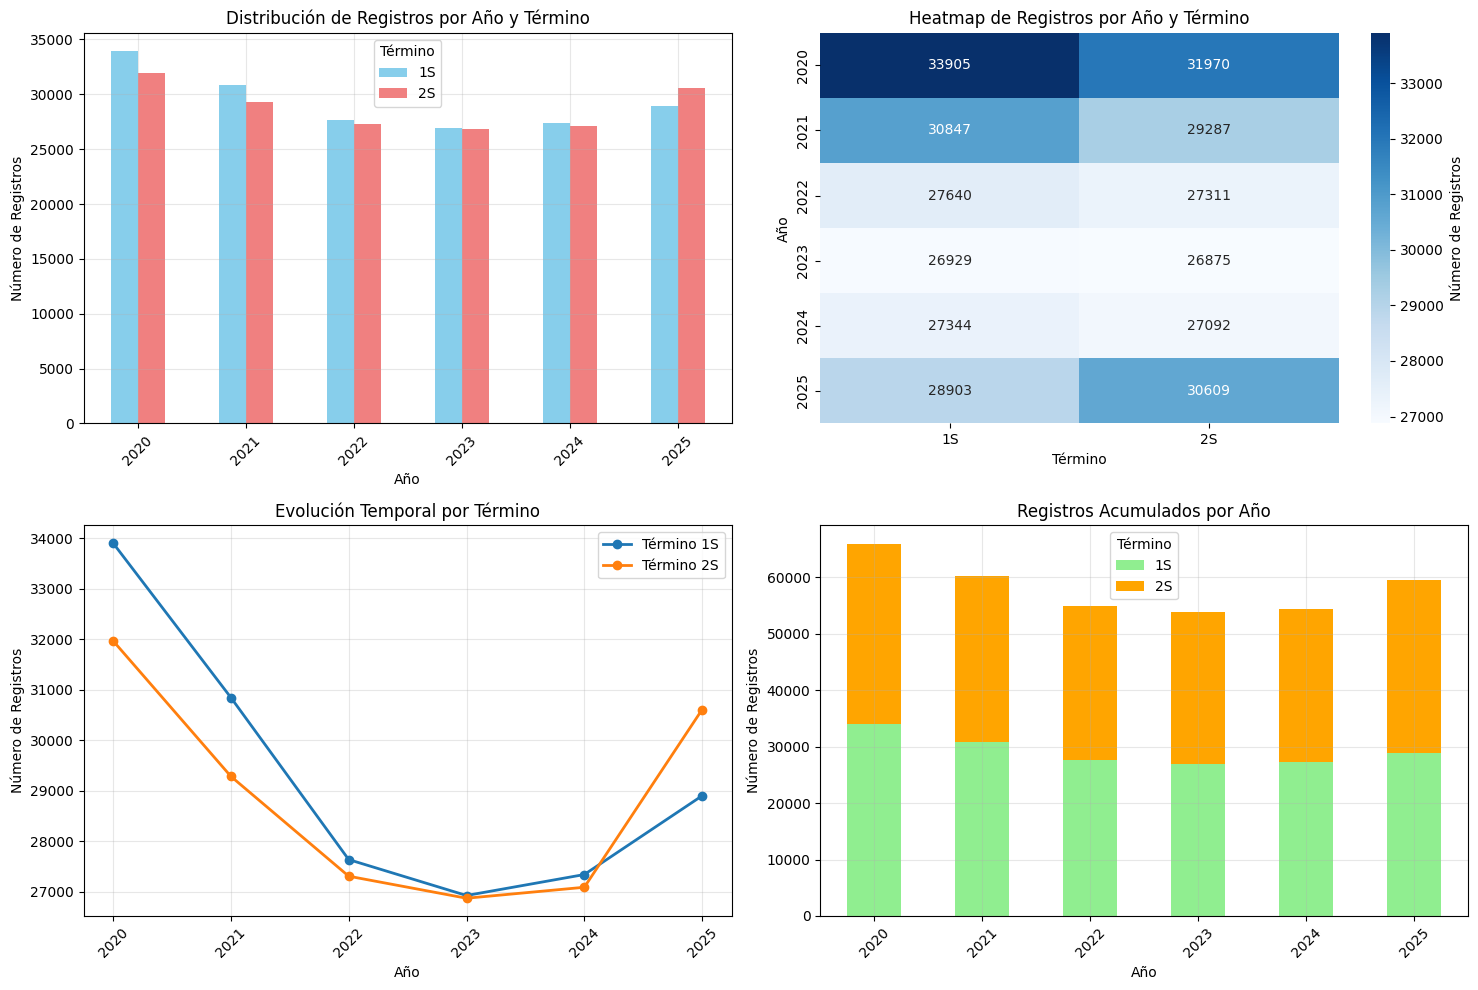


📊 ESTADÍSTICAS GENERALES:
• Total de registros: 348,712
• Años cubiertos: 6
• Términos por año: 2
• Promedio de registros por período: 29059
• Período con más registros: 2020 - 1S (33,905 registros)
• Período con menos registros: 2023 - 2S (26,875 registros)


In [18]:
# Crear el agrupamiento y obtener los conteos
grouped_data = df_complete.groupby(["anio", "termino"]).size().reset_index(name='count')
print("Datos agrupados por año y término:")
print(grouped_data)

# Crear pivot table para mejor visualización
pivot_data = grouped_data.pivot(index='anio', columns='termino', values='count').fillna(0)
print("\nTabla pivot:")
print(pivot_data)

# Crear visualizaciones
plt.figure(figsize=(15, 10))

# 1. Gráfico de barras agrupadas
plt.subplot(2, 2, 1)
pivot_data.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Distribución de Registros por Año y Término')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Término')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(pivot_data, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Número de Registros'})
plt.title('Heatmap de Registros por Año y Término')
plt.ylabel('Año')
plt.xlabel('Término')

# 3. Gráfico de líneas
plt.subplot(2, 2, 3)
for termino in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[termino], marker='o', label=f'Término {termino}', linewidth=2)
plt.title('Evolución Temporal por Término')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 4. Gráfico de barras apiladas
plt.subplot(2, 2, 4)
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightgreen', 'orange'])
plt.title('Registros Acumulados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Término')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"• Total de registros: {grouped_data['count'].sum():,}")
print(f"• Años cubiertos: {len(pivot_data.index)}")
print(f"• Términos por año: {len(pivot_data.columns)}")
print(f"• Promedio de registros por período: {grouped_data['count'].mean():.0f}")
print(f"• Período con más registros: {grouped_data.loc[grouped_data['count'].idxmax(), 'anio']} - {grouped_data.loc[grouped_data['count'].idxmax(), 'termino']} ({grouped_data['count'].max():,} registros)")
print(f"• Período con menos registros: {grouped_data.loc[grouped_data['count'].idxmin(), 'anio']} - {grouped_data.loc[grouped_data['count'].idxmin(), 'termino']} ({grouped_data['count'].min():,} registros)")

In [19]:
df_complete["COD_ESTUDIANTE"].nunique()

19147

##### Materias menos de 10 veces vista

In [20]:
df_complete["COD_MATERIA_ACAD_MO"].value_counts()

COD_MATERIA_ACAD_MO
MATG1045      11593
CCPG1043      11581
INDG1033      10326
FISG1005       8847
IDIG2012       7044
              ...  
LOGT3005         16
ADST3002         16
IDIT3004         16
GEOG1038          7
EDCOM00281        2
Name: count, Length: 689, dtype: int64

In [21]:
df_count_materia = df_complete["COD_MATERIA_ACAD_MO"].value_counts()
res_grades = df_count_materia[df_count_materia < 15]
res_grades.shape

(2,)

In [22]:
filter_name_materias = df_complete[df_complete["COD_MATERIA_ACAD_MO"].isin(res_grades.keys().to_list())]
filter_name_materias["MATERIA"].value_counts()

MATERIA
LEGISLACIÓN Y MITIGACIÓN AMBIENTAL    7
GESTIÓN Y CONTROL DE PROYECTOS        2
Name: count, dtype: int64

In [23]:
filter_name_materias.groupby(["anio", "termino"])["COD_ESTUDIANTE"].count()

anio  termino
2020  1S         2
      2S         0
2023  1S         0
      2S         3
2024  1S         0
      2S         4
Name: COD_ESTUDIANTE, dtype: int64

In [24]:
filter_name_materias[filter_name_materias["MATERIA"] == "GESTIÓN Y CONTROL DE PROYECTOS"].head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,promedio_general,CODIGOMATERIA,MATERIA,anio,termino,PROMEDIO_GENERAL,CANT_ACTUAL_MAT_TOMADAS
12513,201212655,EDCOM00281,AP,2,63,71,"6,70","7,38",63.0,39.0,61.0,"6,34",51.0,"7,19",16.0,N,"2,74",NaN,NaN,0,0,0,1,0,NaN,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS,2020,1S,NaN,1
12514,200909331,EDCOM00281,AP,1,77,84,"8,05","7,38",53.0,35.0,58.0,"6,16",37.0,"7,03",19.0,N,"3,91","5,16",NaN,0,0,0,1,2,NaN,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS,2020,1S,NaN,3


##### Estudiantes que aparecen solo una vez

In [25]:
df_count_estudiante = df_complete["COD_ESTUDIANTE"].value_counts()
res_student = df_count_estudiante[df_count_estudiante < 2]
res_student.shape

(575,)

In [26]:
res_student.head()

COD_ESTUDIANTE
201412957    1
202390076    1
201414220    1
201235473    1
200801645    1
Name: count, dtype: int64

In [27]:
filter_students = df_complete[df_complete["COD_ESTUDIANTE"].isin(res_student.keys().to_list())]
filter_students.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,promedio_general,CODIGOMATERIA,MATERIA,anio,termino,PROMEDIO_GENERAL,CANT_ACTUAL_MAT_TOMADAS
75,201305603,ACUG1043,AP,1,88,79,"8,33","7,55",65.0,62.0,70.0,"7,36",57.0,"7,78",14.0,N,"4,39","4,38",NaN,1,0,0,1,0,NaN,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...,2020,1S,NaN,2
91,201502674,ACUG1043,AP,1,88,75,"8,10","7,55",55.0,66.0,80.0,"8,24",54.0,"8,29",12.0,N,"5,30",NaN,NaN,1,0,0,1,0,NaN,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...,2020,1S,NaN,2
96,201312175,ACUG1045,AP,1,90,84,"8,61","7,97",76.0,60.0,66.0,"6,97",63.0,"7,59",14.0,S,"3,96","2,90","5,03",1,0,1,0,0,NaN,ACUG1045,PRODUCCIÓN ACUÍCOLA II,2020,1S,NaN,2
100,201502694,ACUG1045,AP,1,99,86,"9,05","7,97",53.0,68.0,76.0,"7,96",52.0,"8,01",11.0,N,"5,40",NaN,NaN,1,0,1,0,0,NaN,ACUG1045,PRODUCCIÓN ACUÍCOLA II,2020,1S,NaN,2
104,201507679,ACUG1045,AP,1,98,85,"8,95","7,97",51.0,69.0,76.0,"8,05",50.0,"8,10",10.0,N,"5,45",NaN,NaN,1,0,1,0,0,NaN,ACUG1045,PRODUCCIÓN ACUÍCOLA II,2020,1S,NaN,2


In [28]:
filter_students.groupby(["anio", "ESTADO_MAT_TOMADA_MO"])["COD_ESTUDIANTE"].count()

anio  ESTADO_MAT_TOMADA_MO
2020  AP                      384
      RP                       22
2021  AP                       14
      RP                        6
2022  AP                       14
      PF                        2
      RP                       15
2023  AP                       13
      PF                        6
      RP                        9
2024  AP                       20
      PF                        1
      RP                       14
2025  AC                       34
      AP                        9
      RP                       12
Name: COD_ESTUDIANTE, dtype: int64

In [29]:
filter_students["ESTADO_MAT_TOMADA_MO"].value_counts()

ESTADO_MAT_TOMADA_MO
AP    454
RP     78
AC     34
PF      9
Name: count, dtype: int64

In [30]:
filter_students["MATERIA"].value_counts()

MATERIA
DISEÑO DE PLANTAS                                   53
SISTEMAS DE INFORMACIÓN                             24
DISEÑO DE PLANTAS ALIMENTARIAS                      17
PLANIFICACIÓN DE SISTEMAS DE POTENCIA               16
MANTENIMIENTO INDUSTRIAL                            16
                                                    ..
EXPLOTACIÓN SUBTERRÁNEA                              1
LABORATORIO DE ARQUEOLOGÍA I                         1
METODOLOGÍA DE LA INVESTIGACIÓN EN COMPUTACIÓN       1
ANÁLISIS FINANCIERO                                  1
GESTIÓN Y MARCO REGULATORIO DEL SECTOR ELÉCTRICO     1
Name: count, Length: 152, dtype: int64

In [31]:
print("="*80)
print("ANÁLISIS DE ESTUDIANTES POR AÑO Y ESTADO ACADÉMICO")
print("="*80)

# 1. Estudiantes únicos por año
estudiantes_por_anio = df_complete.groupby('anio')['COD_ESTUDIANTE'].nunique().reset_index()
estudiantes_por_anio.columns = ['anio', 'estudiantes_unicos']
print("\n📊 Estudiantes únicos por año:")
print(estudiantes_por_anio)

# 2. Análisis de estados académicos por estudiante
estados_por_estudiante = df_complete.groupby(['COD_ESTUDIANTE', 'ESTADO_MAT_TOMADA_MO']).size().unstack(fill_value=0)

# Verificar qué columnas de estado existen
print(f"\nEstados académicos disponibles: {estados_por_estudiante.columns.tolist()}")

# Calcular totales por estudiante
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    estados_por_estudiante['Total_RP'] = estados_por_estudiante['RP']
    estados_por_estudiante['Total_AP'] = estados_por_estudiante['AP']
    
    # Top estudiantes con más reprobadas
    top_rp = estados_por_estudiante.nlargest(10, 'Total_RP')[['Total_RP', 'Total_AP']]
    print(f"\n⚠️ Top 10 estudiantes con más materias REPROBADAS:")
    for i, (cod_est, row) in enumerate(top_rp.iterrows(), 1):
        print(f"{i}. Estudiante {cod_est}: {row['Total_RP']} RP, {row['Total_AP']} AP")
    
    # Top estudiantes con más aprobadas
    top_ap = estados_por_estudiante.nlargest(10, 'Total_AP')[['Total_RP', 'Total_AP']]
    print(f"\n✅ Top 10 estudiantes con más materias APROBADAS:")
    for i, (cod_est, row) in enumerate(top_ap.iterrows(), 1):
        print(f"{i}. Estudiante {cod_est}: {row['Total_AP']} AP, {row['Total_RP']} RP")

# Crear visualizaciones
plt.figure(figsize=(18, 12))

# Gráfico 1: Estudiantes únicos por año
plt.subplot(2, 3, 1)
plt.bar(estudiantes_por_anio['anio'], estudiantes_por_anio['estudiantes_unicos'], 
        color='steelblue', alpha=0.7, edgecolor='black')
plt.title('Estudiantes Únicos Inscritos por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Número de Estudiantes Únicos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Agregar valores encima de las barras
for i, v in enumerate(estudiantes_por_anio['estudiantes_unicos']):
    plt.text(i, v + max(estudiantes_por_anio['estudiantes_unicos'])*0.01, 
             f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Top estudiantes con más RP
if 'RP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 2)
    top_rp_plot = estados_por_estudiante.nlargest(15, 'Total_RP')
    estudiantes_labels = [f'Est_{i+1}' for i in range(len(top_rp_plot))]
    
    plt.bar(range(len(top_rp_plot)), top_rp_plot['Total_RP'], 
            color='red', alpha=0.7, edgecolor='black')
    plt.title('Top 15 Estudiantes con Más\nMaterias Reprobadas (RP)', fontsize=14, fontweight='bold')
    plt.xlabel('Estudiantes')
    plt.ylabel('Número de Materias Reprobadas')
    plt.xticks(range(len(top_rp_plot)), estudiantes_labels, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Agregar valores encima de las barras
    for i, v in enumerate(top_rp_plot['Total_RP']):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Top estudiantes con más AP
if 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 3)
    top_ap_plot = estados_por_estudiante.nlargest(15, 'Total_AP')
    estudiantes_labels_ap = [f'Est_{i+1}' for i in range(len(top_ap_plot))]
    
    plt.bar(range(len(top_ap_plot)), top_ap_plot['Total_AP'], 
            color='green', alpha=0.7, edgecolor='black')
    plt.title('Top 15 Estudiantes con Más\nMaterias Aprobadas (AP)', fontsize=14, fontweight='bold')
    plt.xlabel('Estudiantes')
    plt.ylabel('Número de Materias Aprobadas')
    plt.xticks(range(len(top_ap_plot)), estudiantes_labels_ap, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Agregar valores encima de las barras
    for i, v in enumerate(top_ap_plot['Total_AP']):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Evolución temporal de estudiantes únicos
plt.subplot(2, 3, 4)
plt.plot(estudiantes_por_anio['anio'], estudiantes_por_anio['estudiantes_unicos'], 
         marker='o', linewidth=3, markersize=8, color='purple')
plt.title('Evolución Temporal de\nEstudiantes Únicos', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Estudiantes Únicos')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Gráfico 5: Distribución de estados académicos (histograma)
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 5)
    plt.hist([estados_por_estudiante['Total_RP'], estados_por_estudiante['Total_AP']], 
             bins=20, alpha=0.7, label=['Reprobadas (RP)', 'Aprobadas (AP)'], 
             color=['red', 'green'], edgecolor='black')
    plt.title('Distribución de Materias\npor Estudiante', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Materias')
    plt.ylabel('Número de Estudiantes')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Gráfico 6: Relación RP vs AP (scatter plot)
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 6)
    plt.scatter(estados_por_estudiante['Total_AP'], estados_por_estudiante['Total_RP'], 
                alpha=0.6, color='orange', edgecolors='black', s=30)
    plt.title('Relación Materias Aprobadas\nvs Reprobadas', fontsize=14, fontweight='bold')
    plt.xlabel('Materias Aprobadas (AP)')
    plt.ylabel('Materias Reprobadas (RP)')
    plt.grid(True, alpha=0.3)
    
    # Línea de tendencia
    z = np.polyfit(estados_por_estudiante['Total_AP'], estados_por_estudiante['Total_RP'], 1)
    p = np.poly1d(z)
    plt.plot(estados_por_estudiante['Total_AP'], p(estados_por_estudiante['Total_AP']), 
             "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n📈 ESTADÍSTICAS GENERALES:")
print(f"• Total de estudiantes únicos en el dataset: {df_complete['COD_ESTUDIANTE'].nunique():,}")
print(f"• Año con más estudiantes nuevos: {estudiantes_por_anio.loc[estudiantes_por_anio['estudiantes_unicos'].idxmax(), 'anio']} ({estudiantes_por_anio['estudiantes_unicos'].max():,} estudiantes)")
print(f"• Año con menos estudiantes nuevos: {estudiantes_por_anio.loc[estudiantes_por_anio['estudiantes_unicos'].idxmin(), 'anio']} ({estudiantes_por_anio['estudiantes_unicos'].min():,} estudiantes)")

if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    print(f"• Promedio de materias reprobadas por estudiante: {estados_por_estudiante['Total_RP'].mean():.2f}")
    print(f"• Promedio de materias aprobadas por estudiante: {estados_por_estudiante['Total_AP'].mean():.2f}")
    print(f"• Estudiante con más reprobadas: {estados_por_estudiante['Total_RP'].max()} materias")
    print(f"• Estudiante con más aprobadas: {estados_por_estudiante['Total_AP'].max()} materias")

ANÁLISIS DE ESTUDIANTES POR AÑO Y ESTADO ACADÉMICO

📊 Estudiantes únicos por año:
   anio  estudiantes_unicos
0  2020                9908
1  2021                9183
2  2022                8871
3  2023                8723
4  2024                8517
5  2025                9273

Estados académicos disponibles: ['AC', 'AP', 'PF', 'RP']

⚠️ Top 10 estudiantes con más materias REPROBADAS:
1. Estudiante 202007803: 28 RP, 12 AP
2. Estudiante 201804978: 22 RP, 7 AP
3. Estudiante 201710787: 21 RP, 14 AP
4. Estudiante 201903556: 21 RP, 17 AP
5. Estudiante 201907508: 21 RP, 21 AP
6. Estudiante 201911666: 21 RP, 10 AP
7. Estudiante 201515973: 20 RP, 3 AP
8. Estudiante 201916194: 19 RP, 22 AP
9. Estudiante 201908258: 18 RP, 11 AP
10. Estudiante 202008058: 18 RP, 19 AP

✅ Top 10 estudiantes con más materias APROBADAS:
1. Estudiante 202009411: 48 AP, 2 RP
2. Estudiante 202000303: 45 AP, 1 RP
3. Estudiante 202000824: 45 AP, 3 RP
4. Estudiante 202001921: 45 AP, 0 RP
5. Estudiante 202002374: 45 AP, 1 R


📈 ESTADÍSTICAS GENERALES:
• Total de estudiantes únicos en el dataset: 19,147
• Año con más estudiantes nuevos: 2020 (9,908 estudiantes)
• Año con menos estudiantes nuevos: 2024 (8,517 estudiantes)
• Promedio de materias reprobadas por estudiante: 2.08
• Promedio de materias aprobadas por estudiante: 14.49
• Estudiante con más reprobadas: 28 materias
• Estudiante con más aprobadas: 48 materias


##### Mas de una vez visto

In [32]:
df_complete[df_complete["VEZ_TOMADA_MO"] > 1]

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,promedio_general,CODIGOMATERIA,MATERIA,anio,termino,PROMEDIO_GENERAL,CANT_ACTUAL_MAT_TOMADAS
12513,201212655,EDCOM00281,AP,2,63,71,"6,70","7,38",63.0,39.0,61.0,"6,34",51.0,"7,19",16.0,N,"2,74",NaN,NaN,0,0,0,1,0,NaN,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS,2020,1S,NaN,1
35884,201807286,ACUG1036,AP,2,76,66,"6,89","6,74",28.0,61.0,54.0,"6,31",21.0,"7,43",6.0,N,"2,96",NaN,NaN,0,0,0,0,2,NaN,ACUG1036,ANÁLISIS DE DATOS ACUÍCOLAS,2020,2S,NaN,2
35927,201301569,ACUG1043,RP,2,19,0,"0,66","7,55",70.0,56.0,57.0,"6,25",55.0,"7,24",14.0,N,"2,64",NaN,NaN,0,0,0,1,1,NaN,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...,2020,2S,NaN,2
35930,201514209,ACUG1043,AP,2,72,80,"7,42","7,55",51.0,64.0,73.0,"7,47",47.0,"7,74",11.0,N,"4,25",NaN,NaN,0,0,1,1,0,NaN,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...,2020,2S,NaN,2
38316,201311665,ADSG1025,AP,2,70,45,"6,42","7,68",44.0,46.0,51.0,"5,57",26.0,"7,04",13.0,S,"3,48","3,09","4,60",0,0,1,0,1,NaN,ADSG1025,"GESTIÓN DE CALIDAD, AMBIENTE Y SEGURIDAD EN LA...",2020,2S,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366834,202400339,TURG2035,AC,3,0,0,"0,00","6,02",14.0,62.0,70.0,"6,90",10.0,"7,85",4.0,N,"4,08","5,94",NaN,0,0,0,0,3,NaN,TURG2035,GEOGRAFÍA TURÍSTICA,2025,2S,"7,73",3
366839,202204319,TURG2036,AC,2,0,0,"0,00","6,85",24.0,48.0,40.0,"4,84",10.0,"6,81",8.0,N,"4,03","3,32","1,10",0,0,0,0,2,NaN,TURG2036,TEORÍA DEL TURISMO,2025,2S,"6,81",2
366849,202400289,TURG2036,AC,2,0,0,"0,00","6,85",14.0,60.0,55.0,"5,94",9.0,"7,26",4.0,N,"3,58",NaN,NaN,0,0,0,0,3,NaN,TURG2036,TEORÍA DEL TURISMO,2025,2S,"7,15",3
366863,202401048,TURG2036,AC,2,0,0,"0,00","6,85",14.0,65.0,64.0,"6,98",11.0,"7,41",4.0,N,"5,41",NaN,NaN,0,0,0,1,4,NaN,TURG2036,TEORÍA DEL TURISMO,2025,2S,"7,41",5


## Los de socioeconomico

In [33]:
# df_socioeconomico = pd.read_csv("data/materias/socioeconomico_16741.csv")
df_socioeconomico = pd.read_csv("data/materias/socioeconomico_17944.csv")

In [34]:
def id_correct(value):
    if len(value) == 9:
        return "0" + value
    return value

In [35]:
df_socioeconomico.shape

(17944, 131)

In [36]:
df_socioeconomico['CODESTUDIANTE'] = df_socioeconomico['CODESTUDIANTE'].astype(str)
df_socioeconomico['NUMEROIDENTIFICACION'] = df_socioeconomico['NUMEROIDENTIFICACION'].astype(str).str.strip().str.upper()

# Extraer el año de ANIO_TERMINO_INGRESO (formato "2002 1S" -> 2002)
df_socioeconomico['anio_ingreso'] = df_socioeconomico['ANIO_TERMINO_INGRESO'].str.split(' ').str[0].astype(int)
df_socioeconomico['termino_ingreso'] = df_socioeconomico['ANIO_TERMINO_INGRESO'].str.split(' ').str[1].astype(str)

In [37]:
df_socioeconomico["NUMEROIDENTIFICACION"] = df_socioeconomico["NUMEROIDENTIFICACION"].apply(id_correct)

In [38]:
df_socioeconomico.head()

,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso
0,1,3057,2023-04-28,NaN,2022-04-22-22.03.56.450305,200004851,ESCOBAR SEGOVIA,KENNY FERNANDO,kescobar@espol.edu.ec,ECUATORIANA,0921620548,2000 1S,4.0,0.7801,N,NaN,NaN,Masculino,masculino,Mestizo,casado,1982-06-17,ECUADOR,GUAYAS,GUAYAQUIL,95792616; 95792616,2651491,kescobarsegovia@gmail.com,ACADEMIA NAVAL GUAYAQUIL GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2000.0,0.0,MATUTINA (07:00-14:00 APROX.),Ninguna,SI,INGLÉS,Aprendizaje del colegio,3,No se acostumbra en mi hogar servir comida tre...,Compro en bares de ESPOL,NaN,5,16 a 30 minutos,0,2,0,NaN,0,0,0,NaN,0,0,2,0,NaN,0,0,0,NaN,0,INTERMEDIO,SI,SI,NaN,NO,500,100,250,0,0,50,40,20,500,100,100,Secundaria Completa,Superior Universitaria incompleta,Separados[Unión de Hecho],NO,NaN,SI,Otro:No tiene enfermedad;Madre:No tiene enferm...,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,TARQUI,COOP PANCHO JACOME,"0,0",URBANA,SI,NaN,NaN,NaN,NaN,NaN,Casa/Villa,"Propia, totalmente pagada (ha sido totalmente ...",3,2,SI,SI,NO,SI,NO,SI,Zinc /teja /eternit,Cerámica / Baldosa / Vinil,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,CONECTADO A RED DE ALCANTARILLADO,CARRO RECOLECTAOR,EP. CON MEDIDOR EXCLUSIVO DE VIVIENDA,SI,NaN,NO,NaN,0.0,Bachillerato en Ciencias,DESAYUNO;ALMUERZO;MERIENDA,PORTÁTIL EXCLUSIVA,Plan de datos,WIFI EXCLUSIVO DE LA VIVIENDA,4,2000,1S
1,1,4056,2020-10-28,NaN,2020-10-13-18.27.10.390099,200217933,RECALDE GARAY,MARIA TERESA,trecalde@espol.edu.ec,ECUATORIANA,0912190238,2002 1S,4.0,0.8047,N,NaN,0.0,Femenino,femenino,Blanco,soltero,1983-11-17,ECUADOR,GUAYAS,GUAYAQUIL,97214060,2001847; 2354217,teresa.recaldeg@gmail.com,CRUZ DEL SUR GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2002.0,0.0,MATUTINA (07:00-14:00 APROX.),Por situación socioeconómica,SI,INGLÉS,Aprendizaje del colegio,3,NaN,Salgo de ESPOL y voy a comer a casa,NaN,0,15 minutos o menos,0,0,0,NaN,2,0,0,NaN,-1,0,0,0,NaN,0,0,0,N

In [39]:
df_socioeconomico["CODESTUDIANTE"].nunique()

17854

In [40]:
df_complete["COD_ESTUDIANTE"].nunique()

19147

In [41]:
df_socioeconomico["ANIO_TERMINO_INGRESO"].value_counts()

ANIO_TERMINO_INGRESO
2025 2S    1167
2025 1S    1159
2019 1S    1083
2023 1S     950
2024 1S     935
           ... 
2007 3S       1
2000 2S       1
1992 1S       1
1998 3S       1
1999 2S       1
Name: count, Length: 65, dtype: int64

In [42]:
df_socioeconomico[df_socioeconomico["ANIO_TERMINO_INGRESO"] == "2025 2S"].shape

(1167, 133)

In [43]:
df_socioeconomico[df_socioeconomico["ANIO_TERMINO_INGRESO"] == "2025 1S"].shape

(1159, 133)

In [44]:
# edad de los estidiantes a partir de FECHANACIMIENTO
df_socioeconomico["FECHANACIMIENTO"] = pd.to_datetime(df_socioeconomico["FECHANACIMIENTO"], errors='coerce', format="%Y-%m-%d")
# Calcular la edad
today = pd.Timestamp('now')
df_socioeconomico["edad"] = (today.year - df_socioeconomico["FECHANACIMIENTO"].dt.year)

anio_ingreso = df_socioeconomico["ANIO_TERMINO_INGRESO"].str.split(' ').str[0].astype(int)
df_socioeconomico["edad_ingreso"] = (anio_ingreso - df_socioeconomico["FECHANACIMIENTO"].dt.year)

<Axes: xlabel='edad'>

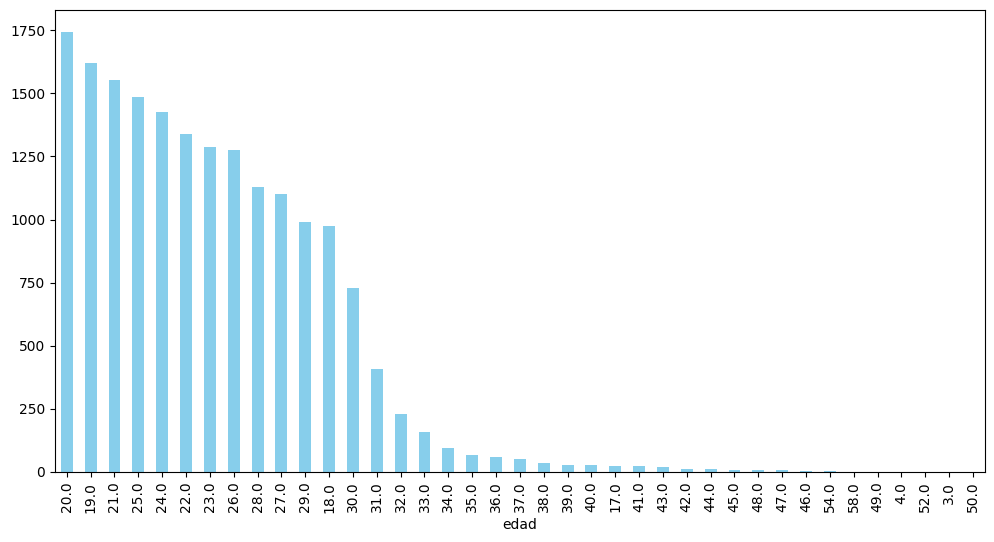

In [45]:
df_socioeconomico["edad"].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')

In [46]:
df_socioeconomico[df_socioeconomico["edad"] < 15]

,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso,edad,edad_ingreso
12470,3,666942,2025-04-24,2024-12-17,2023-05-08-22.22.01.673102,202301461,BUSTAMANTE VILLAMAR,JOSUE ALEXANDER,josbvill@espol.edu.ec,ECUATORIANA,2300344617,2023 1S,1.0,0.2599,N,NaN,0.0,Masculino,masculino,Mestizo,soltero,2021-12-27,ECUADOR,GUAYAS,GUAYAQUIL,78680042,0959798902,ALEXXVILLAMAR9@GMAIL.COM,UNIDAD EDUCATIVA FISCAL REPLICA SIMON BOLIVAR,ECUADOR,GUAYAS,GUAYAQUIL,Fiscal,2022.0,8.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,NaN,NaN,3,NaN,Salgo de ESPOL y voy a comer a casa,NaN,1,61 a 90 minutos,2,0,0,NaN,0,0,0,NaN,0,2,0,0,NaN,0,0,0,NaN,0,BÁSICO,NO,NO,NaN,NO,300,15,60,0,0,15,10,30,0,5,25,Secundaria Completa,Secundaria Completa,Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,PASCUALES,Flor de bastion bloque 22 mz 1401 sl 23,"-2.146178,-79.96581",URBANA,SI,NaN,NaN,NaN,NaN,NaN,Casa/Villa,"Propia, totalmente pagada (ha sido totalmente ...",3,1,SI,SI,NO,SI,NO,NO,Zinc /teja /eternit,Cemento / ladrillo,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,CONECTADO A RED DE ALCANTARILLADO,CARRO RECOLECTAOR,EP. CON MEDIDOR EXCLUSIVO DE VIVIENDA,NO,NaN,NO,NaN,0.0,Bachiller Técnico,DESAYUNO;ALMUERZO;MERIENDA,CELULAR;PORTÁTIL COMPARTIDA,WIFI,WIFI EXCLUSIVO DE LA VIVIENDA,5,2023,1S,4.0,2.0
12905,3,668575,2025-09-12,2025-08-04,2023-05-09-00.03.27.997502,202307344,ALMAO MALVACIAS,DANIEL ALEJANDRO,dalmao@espol.edu.ec,ECUATORIANA,0962947800,2023 1S,2.0,0.5691,N,NaN,0.0,Masculino,masculino,Mestizo,soltero,2022-12-07,ECUADOR,GUAYAS,GUAYAQUIL,89009596,8900959,orpleinadvr@gmail.com,UNIDAD EDUCATIVA EMANUEL 320,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2023.0,10.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,NaN,NaN,3,NaN,Traigo comida de casa,NaN,2,61 a 90 minutos,2,0,0,NaN,0,0,0,NaN,0,2,0,0,NaN,0,0,0,NaN,0,BÁSICO,NO,NaN,Cuenta de ahorro,NO,400,80,80,350,0,20,50,30,0,0,0,Superior Universitaria completa,"Post-grado (maestría, d

In [47]:
df_socioeconomico[df_socioeconomico["edad"] > 45].shape

(21, 135)

In [48]:
df_merge = pd.merge(df_complete, df_socioeconomico, left_on="COD_ESTUDIANTE", right_on="CODESTUDIANTE", how="inner")

In [49]:
df_merge.shape

(336290, 166)

In [50]:
df_merge.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,promedio_general,CODIGOMATERIA,MATERIA,anio,termino,PROMEDIO_GENERAL,CANT_ACTUAL_MAT_TOMADAS,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso,edad,edad_ingreso
0,201160178,ACUG1035,AP,1,87,93,"9,00","7,90",53.0,59.0,64.0,"6,83",47.0,"7,06",17.0,N,"5,14","4,25","5,35",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,NaN,3,1,642436,2019-09-19,NaN,2019-05-24-00.17.24.209662,201160178,RAMIREZ LARREATEGUI,FRANKLIN ANTONIO,franrami@espol.edu.ec,ECUATORIANA,0925230518,2011 2S,2.0,0.5050,N,no definida,0.0,Masculino,masculino,Mestizo,casado,1993-02-16,ECUADOR,GUAYAS,GUAYAQUIL,78697767; 96512912,2555950/0,frank.ram1602@gmail.com,LICEO CRISTIANO VESPERTINO GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2010.0,0.0,VESPERTINA (12:00-18:00 APROX.),Excelencia académica,SI,INGLÉS,Cursos en academias locales,3,NaN,Compro comida a compañeros que traen para venta,NaN,2,61 a 90 minutos,1,0,0,NaN,0,0,-1,NaN,-1,0,0,1,NaN,0,0,-1,NaN,-1,NaN,SI,NaN,NaN,NO,300,60,86,0,0,15,20,20,180,0,30,Superior Universitaria completa,Superior no Universitaria (tecnología o técnic...,Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,PASCUALES,Av. 37 N-O,NaN,URBANA,SI,NaN,NaN,NaN,NaN,NaN,NaN,"Propia, totalmente pagada (ha sido totalmente ...",2,1,SI,NO,NO,SI,NO,NO,Zinc /teja /eternit,Cemento / ladrillo,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,3,2011,2S,32.0,18.0
1,201310353,ACUG1035,AP,1,85,89,"8,70","7,90",59.0,61.0,74.0,"7,48",51.0,"7,94",14.0,S,"4,16","5,20","5,15",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,

## Filtro por anio_ingreso que se mas del 2006 para no tener estudiantes super resagados

In [51]:
df_merge_less_2006 = df_merge[df_merge["anio_ingreso"] < 2006].copy()
df_merge = df_merge[df_merge["anio_ingreso"] >= 2006].copy()

In [52]:
df_merge_less_2006["anio_ingreso"].value_counts()

anio_ingreso
2005    153
2004    136
2001    110
1997     77
2003     68
1999     66
2002     65
1998     34
1990     18
1992     17
1996     11
2000      1
Name: count, dtype: int64

In [53]:
df_merge_less_2006.groupby(["COD_ESTUDIANTE", "anio_ingreso"])["anio"].count().to_dict()

{('199002130', 1990): 18,
 ('199201526', 1992): 17,
 ('199609991', 1996): 8,
 ('199613423', 1996): 3,
 ('199708579', 1997): 9,
 ('199715764', 1997): 29,
 ('199721002', 1997): 1,
 ('199722414', 1997): 38,
 ('199801101', 1998): 3,
 ('199802182', 1998): 2,
 ('199802505', 1998): 5,
 ('199813346', 1998): 7,
 ('199816687', 1998): 10,
 ('199819889', 1998): 7,
 ('199903519', 1999): 34,
 ('199907403', 1999): 6,
 ('199912007', 1999): 15,
 ('199912585', 1999): 4,
 ('199913872', 1999): 5,
 ('199922303', 1999): 2,
 ('200004851', 2000): 1,
 ('200102978', 2001): 26,
 ('200103802', 2001): 2,
 ('200106037', 2001): 2,
 ('200107944', 2001): 9,
 ('200107985', 2001): 1,
 ('200116564', 2001): 5,
 ('200118792', 2001): 31,
 ('200119139', 2001): 5,
 ('200123669', 2001): 16,
 ('200123768', 2001): 10,
 ('200124667', 2001): 2,
 ('200125193', 2001): 1,
 ('200201184', 2002): 9,
 ('200203958', 2002): 1,
 ('200204162', 2002): 2,
 ('200209286', 2002): 1,
 ('200209435', 2002): 3,
 ('200209476', 2002): 1,
 ('200209617',

In [54]:
df_merge["CODESTUDIANTE"].isna().sum()

np.int64(0)

In [55]:
df_merge[df_merge["CODESTUDIANTE"].isna()]["COD_ESTUDIANTE"].nunique()

0

In [56]:
df_merge[~(df_merge["COD_ESTUDIANTE"].isin(df_socioeconomico["CODESTUDIANTE"]))].shape # si es cero todos estan

(0, 166)

## Los de GPA

In [57]:
list_gpa_gemeral = glob.glob("data/materias/gpa_*S.csv")

In [58]:
df_gpa_general = pd.DataFrame()
for file_gpa_gen in list_gpa_gemeral:
    print(file_gpa_gen)
    df_tmp = pd.read_csv(file_gpa_gen)
    df_gpa_general = pd.concat([df_gpa_general, df_tmp], ignore_index=True)

data/materias\gpa_general_2020_0S.csv
data/materias\gpa_general_2020_1S.csv
data/materias\gpa_general_2020_2S.csv
data/materias\gpa_general_2021_1S.csv
data/materias\gpa_general_2021_2S.csv
data/materias\gpa_general_2022_1S.csv
data/materias\gpa_general_2022_2S.csv
data/materias\gpa_general_2023_1S.csv
data/materias\gpa_general_2023_2S.csv
data/materias\gpa_general_2024_1S.csv
data/materias\gpa_general_2024_2S.csv
data/materias\gpa_general_2025_1S.csv
data/materias\gpa_general_2025_2S.csv


In [59]:
df_gpa_general.shape

(99828, 5)

In [60]:
# ANIO to anio_gpa
df_gpa_general.rename(columns={"ANIO": "anio_gpa", "TERMINO": "termino_gpa"}, inplace=True)
df_gpa_general["COD_ESTUDIANTE"] = df_gpa_general["COD_ESTUDIANTE"].astype(str)

In [61]:
df_gpa_general.head()

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR
0,200818094,2020,2S,4.0,32.4
1,200110245,2020,2S,6.0,36.6
2,202010070,2020,2S,6.0,46.5
3,202010120,2020,2S,6.0,40.5
4,202010625,2020,2S,6.0,39.0


In [62]:
df_gpa_general["COD_ESTUDIANTE"].nunique(), df_gpa_general.shape

(18084, (99828, 5))

In [63]:
df_gpa_general.groupby(["anio_gpa", "termino_gpa"])["termino_gpa"].value_counts()

anio_gpa  termino_gpa
2020      1S              8501
          2S             17767
2021      1S              8064
          2S              7745
2022      1S              7508
          2S              7128
2023      1S              7147
          2S              7099
2024      1S              7042
          2S              7165
2025      1S              7107
          2S              7555
Name: count, dtype: int64

In [64]:
df_gpa_general["GPA"] = round(df_gpa_general["NUMERADOR"]/df_gpa_general["DENOMINADOR"], 2)

In [65]:
df_gpa_general[df_gpa_general["GPA"].isna()].head()

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR,GPA
17375,201902194,2020,1S,NaN,NaN,NaN
17376,201916921,2020,1S,NaN,NaN,NaN
26258,201713310,2020,2S,NaN,NaN,NaN
26259,202000097,2020,2S,NaN,NaN,NaN
26260,202002200,2020,2S,NaN,NaN,NaN


In [66]:
df_gpa_general.head()

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR,GPA
0,200818094,2020,2S,4.0,32.4,8.10
1,200110245,2020,2S,6.0,36.6,6.10
2,202010070,2020,2S,6.0,46.5,7.75
3,202010120,2020,2S,6.0,40.5,6.75
4,202010625,2020,2S,6.0,39.0,6.50


In [67]:
df_gpa_general[df_gpa_general["COD_ESTUDIANTE"] == "202504635"]

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR,GPA
92367,202504635,2025,2S,27.0,120.69,4.47


In [68]:
# df_merge_gpa = pd.merge(df_merge, df_gpa_general[["COD_ESTUDIANTE", "GPA"]], left_on="COD_ESTUDIANTE", right_on="COD_ESTUDIANTE", how="left")
df_merge_gpa = pd.merge(df_merge, 
                       df_gpa_general[["COD_ESTUDIANTE", "anio_gpa", "termino_gpa", "GPA"]], 
                       left_on=["COD_ESTUDIANTE", "anio", "termino"], 
                       right_on=["COD_ESTUDIANTE", "anio_gpa", "termino_gpa"], 
                       how="left")

In [69]:
# # Fill NaN values with a default value before converting to int64
# df_merge_gpa["anio_gpa"] = df_merge_gpa["anio_gpa"].fillna(0).astype(np.int64)

In [70]:
df_merge_gpa.shape, df_merge.shape, df_merge.shape[0] == df_merge_gpa.shape[0], df_gpa_general.shape

((362911, 169), (335534, 166), False, (99828, 6))

In [71]:
"""df_merge_gpa[df_merge_gpa["GPA"].isna()].shape""", df_merge_gpa["GPA"].isna().sum(), "Estudiantes unicos sin GPA:", df_merge_gpa[df_merge_gpa["GPA"].isna()]["COD_ESTUDIANTE"].nunique()

('df_merge_gpa[df_merge_gpa["GPA"].isna()].shape',
 np.int64(40694),
 'Estudiantes unicos sin GPA:',
 9807)

In [72]:
list_columns =["COD_ESTUDIANTE", "CODESTUDIANTE", "COD_MATERIA_ACAD_MO", "CODIGOMATERIA", "anio_ingreso", "termino_ingreso", "anio", "termino", "anio_gpa", "termino_gpa", "GPA", "TERMINOS_REGISTRADOS"] 

In [73]:
df_merge_gpa[list_columns].tail()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
362906,202300422,202300422,TURG2037,TURG2037,2023,1S,2025,2S,2025.0,2S,7.78,6.0
362907,202104683,202104683,TURG2037,TURG2037,2021,1S,2025,2S,2025.0,2S,6.78,10.0
362908,202111548,202111548,TURG2037,TURG2037,2021,2S,2025,2S,2025.0,2S,6.79,9.0
362909,202103719,202103719,TURG2037,TURG2037,2021,1S,2025,2S,2025.0,2S,6.76,10.0
362910,202203030,202203030,TURG2037,TURG2037,2022,1S,2025,2S,2025.0,2S,7.80,8.0


##### Estudiantes del semestre 2025 2s

In [74]:
df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 2S"].shape

(4523, 169)

In [75]:
"Estudiantes:", df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 2S"]["COD_ESTUDIANTE"].nunique(), "Cuantas materias:", df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 2S"].shape

('Estudiantes:', 1167, 'Cuantas materias:', (4523, 169))

##### Filtros de GPA si y no

In [76]:
# df_si_gpa = df_merge_gpa[df_merge_gpa["anio"] == df_merge_gpa["anio_gpa"]] # donde si deberia haber gpa
# df_no_gpa = df_merge_gpa[df_merge_gpa["anio"] != df_merge_gpa["anio_gpa"]] # donde no deberia haber gpa
df_si_gpa = df_merge_gpa[~df_merge_gpa["GPA"].isna()]
df_no_gpa = df_merge_gpa[df_merge_gpa["GPA"].isna()]

In [77]:
df_no_gpa[((df_no_gpa["anio"] == 2025) & (df_no_gpa["termino"] == "2S"))].shape, df_si_gpa[((df_si_gpa["anio"] == 2025) & (df_si_gpa["termino"] == "2S"))].shape#[list_columns]

((4543, 169), (25800, 169))

In [78]:
df_merge_gpa.shape[0], df_si_gpa.shape[0], df_no_gpa.shape[0], "Coinciden con el numero total:", df_merge_gpa.shape[0] == df_si_gpa.shape[0] + df_no_gpa.shape[0]

(362911, 322217, 40694, 'Coinciden con el numero total:', True)

In [79]:
df_no_gpa[list_columns].head(5)

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1157,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1158,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1159,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1160,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1161,202006938,202006938,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0


##### df_si_gpa = buscar filas donde el año de 'anio' coincida con el año de 'ANIO_INGRESO' y de igual manera con el termino
Estudiantes que convalidaron materia un semestre antes de ingresar, pero se le cambiara al pre. Estos se limpian para asignar lo del pre

In [80]:
filas_si_gpa_mismo_anio_y_termino = df_si_gpa[(df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])]
filas_si_gpa_mismo_anio_y_termino[list_columns].head()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1232,202004784,202004784,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,8.65,1.0
1407,202004784,202004784,ARQG2042,ARQG2042,2020,1S,2020,1S,2020.0,1S,8.65,1.0
14653,202004784,202004784,HISG2002,HISG2002,2020,1S,2020,1S,2020.0,1S,8.65,1.0
17485,202004784,202004784,INDG1033,INDG1033,2020,1S,2020,1S,2020.0,1S,8.65,1.0
22592,202004784,202004784,MATG2007,MATG2007,2020,1S,2020,1S,2020.0,1S,8.65,1.0


In [81]:
filas_si_gpa_mismo_anio_y_termino.shape, df_si_gpa.shape

((1136, 169), (322217, 169))

In [82]:
filas_si_gpa_mismo_anio_y_termino["anio"].value_counts()

anio
2020    1113
2021      18
2022       5
Name: count, dtype: int64

In [83]:
filas_si_gpa_mismo_anio_y_termino["COD_ESTUDIANTE"].nunique()

142

In [84]:
filas_si_gpa_mismo_anio_y_termino[filas_si_gpa_mismo_anio_y_termino["CODIGOMATERIA"] == "ECOG2067"][["CODIGOMATERIA", "MATERIA"]].iloc[:1, :]

,CODIGOMATERIA,MATERIA
47102,ECOG2067,INTRODUCCIÓN A LA ECONOMÍA


In [85]:
df_merge_gpa[(df_merge_gpa["COD_ESTUDIANTE"] == "202318069") & (~df_merge_gpa["anio_gpa"].isna())][list_columns]

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
316779,202318069,202318069,FISG1005,FISG1005,2023,2S,2025,1S,2025.0,1S,NaN,1.0
318128,202318069,202318069,IDIG1006,IDIG1006,2023,2S,2025,1S,2025.0,1S,NaN,1.0
321107,202318069,202318069,INDG1033,INDG1033,2023,2S,2025,1S,2025.0,1S,NaN,1.0
323232,202318069,202318069,MATG1045,MATG1045,2023,2S,2025,1S,2025.0,1S,NaN,1.0


In [86]:
# Create a mask for the condition
mask = (df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])

# Use loc to properly modify the DataFrame with the mask
df_si_gpa.loc[mask, 'GPA'] = None
df_si_gpa.loc[mask, 'anio_gpa'] = None
df_si_gpa.loc[mask, 'termino_gpa'] = None

# Display the modified rows
df_si_gpa.loc[mask, list_columns].shape

(1136, 12)

In [87]:
# Create a mask for matching conditions
mask2 = (df_merge_gpa["anio"] == df_merge_gpa["anio_gpa"]) & (df_merge_gpa['anio'] == df_merge_gpa['anio_ingreso']) & (df_merge_gpa['termino'] == df_merge_gpa['termino_ingreso'])

# Set GPA to None for these rows
df_merge_gpa.loc[mask2, 'GPA'] = None
df_merge_gpa.loc[mask2, 'anio_gpa'] = None
df_merge_gpa.loc[mask2, 'termino_gpa'] = None

# Show the shape of the filtered DataFrame
df_merge_gpa.loc[mask2, list_columns].shape

(1142, 12)

##### De nuevo Filtro de GPA si y no con GPA y Buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino
ya que se descartaron los convalidados de antes de ingresar a primer termino, se agregará solo lo del pre

In [88]:
df_si_gpa = df_merge_gpa[~df_merge_gpa["GPA"].isna()] # donde si deberia haber gpa
df_no_gpa = df_merge_gpa[df_merge_gpa["GPA"].isna()] # donde no deberia haber gpa

In [89]:
df_merge_gpa.shape[0], df_si_gpa.shape[0], df_no_gpa.shape[0], "Coinciden con el numero total:", df_merge_gpa.shape[0] == df_si_gpa.shape[0] + df_no_gpa.shape[0]

(362911, 321081, 41830, 'Coinciden con el numero total:', True)

In [90]:
# Ya no deberia haber filas con mismo anio y termino que anio y termino de ingreso con GPA
filas_si_gpa_mismo_anio_y_termino = df_si_gpa[(df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])]
filas_si_gpa_mismo_anio_y_termino[list_columns].shape[0], "deberia ser 0 ya que en la subseccion anterior se descartan ya que pueden convalidar previamente materias"

(0,
 'deberia ser 0 ya que en la subseccion anterior se descartan ya que pueden convalidar previamente materias')

In [91]:
df_si_gpa[df_si_gpa['anio'] == df_si_gpa['anio_ingreso']].shape, df_si_gpa[df_si_gpa['termino'] == df_si_gpa['termino_ingreso']].shape

((23495, 169), (148759, 169))

##### df_no_gpa = buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino (sin GPA). Tambien que su TERMINOS_REGISTRADOS sea igual a 1 ya que seria su primer semestre en caso haya realizado un savático.

Los que se actualizaran con la info del pre

In [92]:
# mismo anio y termino con el de ingreso, tambien que sea su primer termino
filas_no_gpa_mismo_anio_y_termino_tmb_1 = df_no_gpa[
    (
        (df_no_gpa['anio'] == df_no_gpa['anio_ingreso']) & (df_no_gpa['termino'] == df_no_gpa['termino_ingreso'])
    ) | 
    (df_no_gpa["TERMINOS_REGISTRADOS"] == 1)
]
df_no_gpa.shape, filas_no_gpa_mismo_anio_y_termino_tmb_1.shape[0], df_no_gpa.shape[0] - filas_no_gpa_mismo_anio_y_termino_tmb_1.shape[0]

((41830, 169), 41830, 0)

In [93]:
print(f"Total de filas en df_no_gpa: {len(df_no_gpa):,}")
print(f"Filas donde anio coincide con año de ingreso: {len(filas_no_gpa_mismo_anio_y_termino_tmb_1):,}")
print(f"Porcentaje de coincidencia: {len(filas_no_gpa_mismo_anio_y_termino_tmb_1)/len(df_no_gpa)*100:.3f}%")

Total de filas en df_no_gpa: 41,830
Filas donde anio coincide con año de ingreso: 41,830
Porcentaje de coincidencia: 100.000%


In [94]:
print(f"\nPrimeras 10 filas que coinciden:")
filas_no_gpa_mismo_anio_y_termino_tmb_1[list_columns].head()


Primeras 10 filas que coinciden:


,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1157,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1158,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1159,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1160,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1161,202006938,202006938,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0


In [95]:
print(f"\nAnálisis de años:")
print(f"Años únicos en 'anio': {sorted(filas_no_gpa_mismo_anio_y_termino_tmb_1['anio'].unique())}")
print(f"Años únicos en 'ANIO_TERMINO_INGRESO': {sorted(filas_no_gpa_mismo_anio_y_termino_tmb_1['anio_ingreso'].unique())}")


Análisis de años:
Años únicos en 'anio': [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Años únicos en 'ANIO_TERMINO_INGRESO': [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]


## Novatos: asignar su valor del pre como GPA

In [96]:
# estudiantes de ingreso segun su año de estudio y de ingreso, igual con termino
lista_estudiantes_ingreso = [str(x).strip().upper() for x in filas_no_gpa_mismo_anio_y_termino_tmb_1["NUMEROIDENTIFICACION"].unique()]

In [97]:
def id_correct(value):
    if len(value) == 9:
        return "0" + value
    return value

In [98]:
query_novatos = get_gpa_novatos(lista_estudiantes_ingreso)
query_novatos

"SELECT p.numeroidentificacion, AVG(ca.PROMEDIO) as gpa\n    FROM espol.tbl_persona p\n    INNER JOIN espol.tbl_inscripcion i ON p.idpersona = i.idpersona\n    INNER JOIN ESPOL.TBL_CURSO_PERSONA ca ON i.idpersonaprograma = ca.idpersonaprograma AND ca.idperiodo = i.idperiodo\n    WHERE p.numeroidentificacion IN ('0927437186','0951908326','0953950052','0959143579','1314449271','0952811362','0957019342','0952964344','0953473774','0941933152','0941441933','0955315148','0932634611','0954187514','0926286238','0106140387','0952241289','0706284171','0952481323','0924253172','0952908549','0952383305','0943709907','0958842429','0954769477','0943156679','0954439147','0952490407','0930649066','0106475114','0952043610','0930618368','1316787488','0958500993','0941267247','0958416562','0925642837','0950644674','0931911275','0944067230','2000123337','0932169006','0951237189','1317981221','0924614142','0952938470','0932316458','0927244780','0944210731','0954139887','0925794984','0951852979','0926236837

In [99]:
conn = ibm_db.connect('DATABASE=' + os.getenv('DATABASE_DAGO') + ';HOSTNAME=' + os.getenv('HOSTNAME') + ';PORT=' + os.getenv('PORT') + ';PROTOCOL=TCPIP;UID=' + os.getenv('USERNAME_DB') + ';PWD=' + os.getenv('PASSWORD_DB') + ';', '', '')
# conn = ibm_db.connect(os.getenv('DATABASE'), os.getenv('USERNAME_DB'), os.getenv('PASSWORD_DB')) # os.getenv('HOSTNAME'), os.getenv('PORT')

if conn:
    print("Conexión exitosa")
else:
    print("Error al conectar")

Conexión exitosa


Consulta en la base de datos

In [100]:
stmt_select  = ibm_db.exec_immediate(conn, query_novatos)

In [101]:
# Fetch all rows
data_list = []
result = ibm_db.fetch_assoc(stmt_select)
while result:
    # print(result)
    data_list.append(result)
    result = ibm_db.fetch_assoc(stmt_select)

In [102]:
# Close the connection
ibm_db.close(conn)

True

In [103]:
# df de la base de datos de admisiones
df_gpa_admisiones = pd.DataFrame(data_list)
df_gpa_admisiones["NUMEROIDENTIFICACION"] = df_gpa_admisiones["NUMEROIDENTIFICACION"].astype(str).str.strip().str.upper()
df_gpa_admisiones["GPA"] = df_gpa_admisiones["GPA"].str.replace(',', '.').astype(float).round(2)

In [104]:
"DE:", len(lista_estudiantes_ingreso), "Se generaron=", df_gpa_admisiones.shape[0], "Hay nulos =", df_gpa_admisiones[df_gpa_admisiones["GPA"].isna()].shape[0]

('DE:', 9949, 'Se generaron=', 9939, 'Hay nulos =', 0)

In [105]:
df_gpa_admisiones[~(df_gpa_admisiones["NUMEROIDENTIFICACION"].isin(lista_estudiantes_ingreso))]
# si esta vacio estan todo los de admisiones en la lista

,NUMEROIDENTIFICACION,GPA


##### Se decarta estudiantes que estan en SAAC(semestres) pero no en DAGO(admisiones)

In [106]:
# valores en lista_estudiantes_ingreso que no esten en df_gpa_admisiones
faltantes_de_estudiante_en_admisiones = [x for x in lista_estudiantes_ingreso if x not in df_gpa_admisiones["NUMEROIDENTIFICACION"].values]
len(faltantes_de_estudiante_en_admisiones), faltantes_de_estudiante_en_admisiones

(10,
 ['0966288979',
  '0922571815',
  '0963687983',
  '0925693582',
  '1206554139',
  '0604271163',
  '0953464294',
  '0705977213',
  '74374263',
  '73062064'])

In [107]:
df_merge_gpa_real_novatos = df_merge_gpa[~df_merge_gpa["NUMEROIDENTIFICACION"].isin(faltantes_de_estudiante_en_admisiones)]
df_merge_gpa_real_novatos.shape, df_merge_gpa.shape, "Se descartaron:", df_merge_gpa.shape[0] - df_merge_gpa_real_novatos.shape[0], "ya que no constan en admisiones"

((362685, 169),
 (362911, 169),
 'Se descartaron:',
 226,
 'ya que no constan en admisiones')

In [108]:
df_gpa_admisiones.head()

,NUMEROIDENTIFICACION,GPA
0,0104853841,5.16
1,0105426662,7.74
2,0105660096,6.60
3,0105663488,6.92
4,0106003825,7.15


In [109]:
df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["GPA"].isna()][list_columns]

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1157,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1158,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1159,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1160,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
1161,202006938,202006938,ARQG2041,ARQG2041,2020,1S,2020,1S,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361109,202516688,202516688,QUIG1032,QUIG1032,2025,2S,2025,2S,NaN,NaN,NaN,1.0
361110,202517090,202517090,QUIG1032,QUIG1032,2025,2S,2025,2S,NaN,NaN,NaN,1.0
361111,202517314,202517314,QUIG1032,QUIG1032,2025,2S,2025,2S,NaN,NaN,NaN,1.0
361112,202517389,202517389,QUIG1032,QUIG1032,2025,2S,2025,2S,NaN,NaN,NaN,1.0


In [110]:
# 🔧 CÓDIGO CORREGIDO - Actualización de GPA con validaciones
gpa_map = df_gpa_admisiones.set_index('NUMEROIDENTIFICACION')['GPA'].to_dict()

# Identificar registros candidatos para actualización
mask_candidates = (
    (
        (
            (df_merge_gpa_real_novatos["anio_ingreso"] == df_merge_gpa_real_novatos["anio"]) & 
            (df_merge_gpa_real_novatos["termino_ingreso"] == df_merge_gpa_real_novatos["termino"])
        ) |
        (df_merge_gpa_real_novatos["TERMINOS_REGISTRADOS"] == 1) 
    ) & 
    (df_merge_gpa_real_novatos['GPA'].isna())  # Solo los que no tienen GPA
)

print(f"📊 Candidatos para actualización: {mask_candidates.sum()}")

# Obtener solo los registros candidatos
df_candidates = df_merge_gpa_real_novatos[mask_candidates].copy()

# Mapear GPA para candidatos
df_candidates['GPA_mapped'] = df_candidates['NUMEROIDENTIFICACION'].map(gpa_map)

# Identificar cuáles tienen GPA válido (no NaN)
has_valid_gpa = df_candidates['GPA_mapped'].notna()

print(f"📈 Candidatos con GPA válido en admisiones: {has_valid_gpa.sum()}")

# Actualizar solo los registros que tienen GPA válido
if has_valid_gpa.sum() > 0:
    # Crear máscara final para los índices originales
    valid_indices = df_candidates[has_valid_gpa].index
    
    # Actualizar GPA
    df_merge_gpa_real_novatos.loc[valid_indices, 'GPA'] = df_candidates.loc[has_valid_gpa, 'GPA_mapped']
    
    # Actualizar anio_gpa y termino_gpa SOLO para los que se actualizó GPA
    df_merge_gpa_real_novatos.loc[valid_indices, 'anio_gpa'] = df_merge_gpa_real_novatos.loc[valid_indices, 'anio_ingreso']
    df_merge_gpa_real_novatos.loc[valid_indices, 'termino_gpa'] = df_merge_gpa_real_novatos.loc[valid_indices, 'termino_ingreso']
    
    print(f"✅ Actualizados {len(valid_indices)} registros con GPA de admisiones")
else:
    print("⚠️ No se encontraron registros válidos para actualizar")

# Verificar que no existan registros con anio_gpa/termino_gpa sin GPA
invalid_records = df_merge_gpa_real_novatos[
    (df_merge_gpa_real_novatos['GPA'].isna()) & 
    (df_merge_gpa_real_novatos['anio_gpa'].notna() | df_merge_gpa_real_novatos['termino_gpa'].notna())
]

print(f"🚨 Registros inconsistentes (GPA nulo pero con anio_gpa/termino_gpa): {len(invalid_records)}")

if len(invalid_records) > 0:
    # Limpiar registros inconsistentes
    df_merge_gpa_real_novatos.loc[invalid_records.index, 'anio_gpa'] = np.nan
    df_merge_gpa_real_novatos.loc[invalid_records.index, 'termino_gpa'] = np.nan
    print("🧹 Limpieza completada: anio_gpa y termino_gpa puestos a None para registros con GPA nulo")

📊 Candidatos para actualización: 41800
📈 Candidatos con GPA válido en admisiones: 41800
✅ Actualizados 41800 registros con GPA de admisiones
🚨 Registros inconsistentes (GPA nulo pero con anio_gpa/termino_gpa): 0


In [111]:
# df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["NUMEROIDENTIFICACION"] == "0957341480"][list_columns]
# df_gpa_general[df_gpa_general["COD_ESTUDIANTE"] == "202105904"]

In [112]:
print("Deberia ser cero ya que se filtro los que entraron directo sin pre y se obtiene el gpa hasta un año antes del objetivo =", df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["GPA"].isna()]["NUMEROIDENTIFICACION"].nunique()) # [list_columns] # ["MATERIA"].unique()

Deberia ser cero ya que se filtro los que entraron directo sin pre y se obtiene el gpa hasta un año antes del objetivo = 0


##### De nuevo Filtro de GPA si y no con GPA y Buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino
ya que se descartaron los estudiantes que no estan en admisiones pero si en semestre

In [113]:
df_si_gpa = df_merge_gpa_real_novatos[~df_merge_gpa_real_novatos["GPA"].isna()]
df_no_gpa = df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["GPA"].isna()]

In [114]:
df_merge_gpa_real_novatos.shape[0], df_si_gpa.shape[0], df_no_gpa.shape[0], "Coinciden con el numero total:", df_merge_gpa_real_novatos.shape[0] == df_si_gpa.shape[0] + df_no_gpa.shape[0]

(362685, 362685, 0, 'Coinciden con el numero total:', True)

Revision de no GPA

In [115]:
df_no_gpa[list_columns]

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS


Donde al año y termino coinciden con el de ingreso y con TERMINOS_REGISTRADOS = 1, deberia ser cero con el procesamiento previo

In [116]:
filas_no_gpa_mismo_anio_y_termino = df_no_gpa[
    (df_no_gpa["anio_ingreso"] == df_no_gpa["anio"]) & 
    (df_no_gpa["termino_ingreso"] == df_no_gpa["termino"])
]
print(filas_no_gpa_mismo_anio_y_termino.shape[0], "deberia ser cero con el procesamiento previo", filas_no_gpa_mismo_anio_y_termino.shape[0] == 0)

0 deberia ser cero con el procesamiento previo True


De aqui deberia ser cero

In [117]:
df_no_gpa[~(((df_no_gpa["anio"] == 2025) & (df_no_gpa["termino"] == "2S")) | df_no_gpa["TERMINOS_REGISTRADOS"] == 1)][list_columns]#["anio_ingreso"].unique()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS


Revisión de df_si_gpa

In [118]:
filas_si_gpa_mismo_anio_y_termino = df_si_gpa[((df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso']))]
filas_si_gpa_mismo_anio_y_termino_primer_term = df_si_gpa[((df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])) | (df_si_gpa["TERMINOS_REGISTRADOS"] == 1)]
df_si_gpa.shape[0], filas_si_gpa_mismo_anio_y_termino.shape[0], filas_si_gpa_mismo_anio_y_termino_primer_term.shape[0]

(362685, 41587, 41869)

In [119]:
filas_si_gpa_mismo_anio_y_termino_primer_term[list_columns].head()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
1157,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,5.72,1.0
1158,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,7.16,1.0
1159,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,4.30,1.0
1160,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,5.53,1.0
1161,202006938,202006938,ARQG2041,ARQG2041,2020,1S,2020,1S,2020.0,1S,5.97,1.0


## Revision de todo lo socioeconomico

In [120]:
df_merge_gpa_real_novatos.head(2)

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,promedio_general,CODIGOMATERIA,MATERIA,anio,termino,PROMEDIO_GENERAL,CANT_ACTUAL_MAT_TOMADAS,ESTACOMPLETA,IDPERSONA,FECHACREACION,FECHAENVIOUBEP,FECHAENVIO,CODESTUDIANTE,APELLIDOS,NOMBRES,EMAIL,P1_NACIONALIDAD,NUMEROIDENTIFICACION,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,TIENEDISCAPACIDAD,TIPODISCAPACIDAD,PORCENTAJEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,TELEFONOCELULAR,TELEFONOFIJO,CORREOALTERNO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,IDIOMAS,COBOCIMIENTOINGLESPOR,COMIDASALDIA,FRASETRESCOMIDAS,FRASEHABITOALIMENTICIO,FRASEHABITOALIMENTICIOV2,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,TIEMPOPROMEDIOBICICLETAENTRADAESPOL,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,CAMINAENTRADA,TIEMPOPROMEDIOCAMINATAENTRADAESPOL,VECESTRICIMOTOENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,TIEMPOPROMEDIOBICICLETASALIDAESPOL,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,CAMINASALIDA,TIEMPOPROMEDIOCAMINATASALIDAESPOL,VECESTRICIMOTOSALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,CUENTASBANCO,HERMANOSESTUDIANDOESPOL,ALIMENTACION,TRANSPORTE,SERVICIOS,ARRIENDO,ALICUOTAS,VESTIMENTA,SALUD,EDUCACION,TARJETACREDITO,ENTRETENIMIENTO,OTROS,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,PARROQUIAVIVE,DIRECCION,COORDENADAS,TIPOPARROQUIA,VIVEGRUPOFAMILIAR,PAISVIVESEP,PROVINCIAVIVIENDASEP,CANTONVIVESEP,PARROQUIAVIVESEP,DIRECCIONVIVSEP,TIPOVIVIENDASEP,ESTADOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,SALA,COMEDOR,ESTUDIO,COCINA,LAVANDERIA,GARAJE,METERIALTECHOVIVIENDASEP,METERIALPISOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,SERVHIGIENE,ELIMINACIONBASURA,SERVICIOELECTRICIDAD,POSEEVEHICULO,CANTIDADVEHICULO,RECIBEAYUDA,PARIENTEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,MANEJOCELULAR,ACCESOINTERNET,NUMEROSFAMILIARES,anio_ingreso,termino_ingreso,edad,edad_ingreso,anio_gpa,termino_gpa,GPA
0,201160178,ACUG1035,AP,1,87,93,"9,00","7,90",53.0,59.0,64.0,"6,83",47.0,"7,06",17.0,N,"5,14","4,25","5,35",0,0,2,1,0,NaN,ACUG1035,ACUICULTURA ORNAMENTAL,2020,1S,NaN,3,1,642436,2019-09-19,NaN,2019-05-24-00.17.24.209662,201160178,RAMIREZ LARREATEGUI,FRANKLIN ANTONIO,franrami@espol.edu.ec,ECUATORIANA,0925230518,2011 2S,2.0,0.5050,N,no definida,0.0,Masculino,masculino,Mestizo,casado,1993-02-16,ECUADOR,GUAYAS,GUAYAQUIL,78697767; 96512912,2555950/0,frank.ram1602@gmail.com,LICEO CRISTIANO VESPERTINO GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2010.0,0.0,VESPERTINA (12:00-18:00 APROX.),Excelencia académica,SI,INGLÉS,Cursos en academias locales,3,NaN,Compro comida a compañeros que traen para venta,NaN,2,61 a 90 minutos,1,0,0,NaN,0,0,-1,NaN,-1,0,0,1,NaN,0,0,-1,NaN,-1,NaN,SI,NaN,NaN,NO,300,60,86,0,0,15,20,20,180,0,30,Superior Universitaria completa,Superior no Universitaria (tecnología o técnic...,Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,PASCUALES,Av. 37 N-O,NaN,URBANA,SI,NaN,NaN,NaN,NaN,NaN,NaN,"Propia, totalmente pagada (ha sido totalmente ...",2,1,SI,NO,NO,SI,NO,NO,Zinc /teja /eternit,Cemento / ladrillo,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,3,2011,2S,32.0,18.0,2020.0,1S,6.72
1,201310353,ACUG1035,AP,1,85,89,"8,70","7,90",59.0,61.0,74.0,"7,48",51.0,"7,94",14.0,S,"4,16","5,20","5,15",0,0,2,

In [121]:
df_merge_gpa_real_novatos.shape

(362685, 169)

In [122]:
df_merge_gpa_real_novatos["ESTADO_MAT_TOMADA_MO"].value_counts() # PF = perdidad por falta, RP = reprobada, AP = aprobada, AC = acreditada

ESTADO_MAT_TOMADA_MO
AP    291963
RP     39593
AC     30328
PF       801
Name: count, dtype: int64

In [123]:
df_merge_gpa_real_novatos["SEXO"].value_counts()

SEXO
Masculino    217084
Femenino     145601
Name: count, dtype: int64

In [124]:
df_merge_gpa_real_novatos["RECIBEAYUDA"].value_counts()

RECIBEAYUDA
NO    326146
SI     24489
Name: count, dtype: int64

In [125]:
df_merge_gpa_real_novatos["ANIOGRADUACION"].value_counts()

ANIOGRADUACION
2019.0    47949
2018.0    47040
2020.0    43084
2017.0    33595
2021.0    32805
2022.0    31738
2023.0    30117
2016.0    22172
2015.0    17192
2024.0    16952
2014.0    11842
2013.0     8537
2025.0     5541
2012.0     5327
2011.0     2920
2010.0     1638
2008.0      847
2009.0      846
2007.0      538
2006.0      440
2005.0      262
2003.0      167
2004.0       92
2002.0       86
2000.0       55
0.0          46
1999.0       36
1995.0       30
2001.0       27
19.0         17
6.0          17
1992.0       15
3.0          10
1997.0       10
25.0          4
1998.0        1
Name: count, dtype: int64

In [126]:
df_merge_gpa_real_novatos["ESTADOVIVIENDASEP"].value_counts()

ESTADOVIVIENDASEP
Propia, totalmente pagada (ha sido totalmente pagada o ha sido heredada)                                                                                  195301
Comprada y se está pagando (incluye la vivienda que está hipotecada por concepto de crédito hipotecario utilizado para su adquisición)                     55389
Arriendo O Alquiler                                                                                                                                        53252
Cedida (Si el inmueble es entregado por una persona, un familiar o una institución para ser habitado por un hogar, sin costo alguno)                       46896
Cedida Con Pago de Servicios                                                                                                                               10848
Recibida por servicios (Si el inmueble ocupado lo recibieron como parte de pago o como parte de las condiciones de trabajo de algún miembro del hogar)       999
Name: count, dty

In [127]:
df_merge_gpa_real_novatos["TIPOVIVIENDASEP"].value_counts()

TIPOVIVIENDASEP
Casa/Villa                          287241
Departamento en casa                 35408
Departamento en edificio             14846
Cuarto(s) en casa de inquilinato      5246
Otro                                  4169
Rancho                                 696
Choza                                  431
Covacha                                167
Name: count, dtype: int64

In [128]:
df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["TIPOVIVIENDASEP"] == "Choza"].shape

(431, 169)

In [129]:
df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["TIPOVIVIENDASEP"] == "Choza"][list_columns + ["TIPOVIVIENDASEP", "SEXO", "RECIBEAYUDA", "COLEGIO", "JORNADA", "TIPOCOLEGIO", "BECACOLEGIO", "ANIOGRADUACION", "IDIOMAS", "NIVELINGLES", "ESTADOVIVIENDASEP"]].head()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS,TIPOVIVIENDASEP,SEXO,RECIBEAYUDA,COLEGIO,JORNADA,TIPOCOLEGIO,BECACOLEGIO,ANIOGRADUACION,IDIOMAS,NIVELINGLES,ESTADOVIVIENDASEP
345,201901956,201901956,ADSG1025,ADSG1025,2019,1S,2020,1S,2020.0,1S,7.09,4.0,Choza,Femenino,NO,LUIS BONINI PINO,VESPERTINA (12:00-18:00 APROX.),Fiscal,Ninguna,2018.0,INGLÉS,INTERMEDIO,Comprada y se está pagando (incluye la viviend...
2025,201800125,201800125,ARTG2026,ARTG2026,2018,1S,2020,1S,2020.0,1S,7.00,5.0,Choza,Femenino,NO,DE LA ASUNCION,NOCTURNA (19:00-22:00 APROX.),Particular,Ninguna,2015.0,NaN,NaN,Comprada y se está pagando (incluye la viviend...
2130,201800125,201800125,ARTG2028,ARTG2028,2018,1S,2020,1S,2020.0,1S,7.00,5.0,Choza,Femenino,NO,DE LA ASUNCION,NOCTURNA (19:00-22:00 APROX.),Particular,Ninguna,2015.0,NaN,NaN,Comprada y se está pagando (incluye la viviend...
2311,201709474,201709474,ARTG2029,ARTG2029,2017,2S,2020,1S,2020.0,1S,7.55,6.0,Choza,Masculino,NO,UNIDAD EDUCATIVA FAE 2,VESPERTINA (12:00-18:00 APROX.),Particular,Ninguna,2016.0,NaN,BÁSICO,Cedida (Si el inmueble es entregado por una pe...
2312,201709474,201709474,ARTG2029,ARTG2029,2017,2S,2020,1S,2020.0,1S,7.55,6.0,Choza,Masculino,NO,UNIDAD EDUCATIVA FAE 2,VESPERTINA (12:00-18:00 APROX.),Particular,Ninguna,2016.0,NaN,BÁSICO,Cedida (Si el inmueble es entregado por una pe...


## ANÁLISIS EXPLORATORIO DE DATOS (EDA)
### Dataset: df_merge_gpa_real_novatos

Análisis detallado de las variables socioeconómicas y académicas

In [130]:
mask_fill_gpa = (
    (df_merge_gpa_real_novatos["PROM_CALIFICACIONES"].isna()) & 
    (df_merge_gpa_real_novatos["TERMINOS_REGISTRADOS"] == 1)
)

df_merge_gpa_real_novatos.loc[mask_fill_gpa, "PROM_CALIFICACIONES"] = df_merge_gpa_real_novatos.loc[mask_fill_gpa, "GPA"]

mask_fill_gpa = (
    (df_merge_gpa_real_novatos["PROM_1PARCIAL"].isna()) & 
    (df_merge_gpa_real_novatos["TERMINOS_REGISTRADOS"] == 1)
)

df_merge_gpa_real_novatos.loc[mask_fill_gpa, "PROM_1PARCIAL"] = df_merge_gpa_real_novatos.loc[mask_fill_gpa, "GPA"]

In [131]:
df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["GPA"].isna()].shape, df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["PROM_CALIFICACIONES"].isna()].shape, df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["PROM_1PARCIAL"].isna()].shape
# df_merge_gpa_real_novatos[(df_merge_gpa_real_novatos["PROM_CALIFICACIONES"].isna()) & (df_merge_gpa_real_novatos["anio"] == df_merge_gpa_real_novatos["anio_ingreso"])][list_columns]
# 41884 

((0, 169), (12, 169), (12, 169))

In [132]:
df_merge_gpa_real_novatos[df_merge_gpa_real_novatos["PROM_1PARCIAL"].isna()][["PROM_CALIFICACIONES", "PROM_1PARCIAL"] + list_columns]

,PROM_CALIFICACIONES,PROM_1PARCIAL,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,termino,anio_gpa,termino_gpa,GPA,TERMINOS_REGISTRADOS
14884,NaN,NaN,200847689,200847689,IDIG1006,IDIG1006,2009,1S,2020,1S,2020.0,1S,4.80,6.0
17437,NaN,NaN,200847689,200847689,INDG1033,INDG1033,2009,1S,2020,1S,2020.0,1S,4.80,6.0
27321,NaN,NaN,200847689,200847689,QUIG1032,QUIG1032,2009,1S,2020,1S,2020.0,1S,4.80,6.0
186104,NaN,NaN,201169530,201169530,INDG1033,INDG1033,2011,2S,2022,2S,2022.0,2S,6.84,2.0
188161,NaN,NaN,201169530,201169530,MATG1045,MATG1045,2011,2S,2022,2S,2022.0,2S,6.84,2.0
194221,NaN,NaN,201169530,201169530,QUIG1032,QUIG1032,2011,2S,2022,2S,2022.0,2S,6.84,2.0
314417,NaN,NaN,200626182,200626182,ELET3001,ELET3001,2006,1S,2025,1S,2025.0,1S,5.48,5.0
314444,NaN,NaN,200626182,200626182,ELET3002,ELET3002,2006,1S,2025,1S,2025.0,1S,5.48,5.0
315867,NaN,NaN,200626182,200626182,ESTT3002,ESTT3002,2006,1S,2025,1S,2025.0,1S,5.48,5.0
320867,NaN,NaN,200626182,200626182,IDIT3002,IDIT3002,2006,1S,2025,1S,2025.0,1S,5.48,5.0


In [133]:
# si VIVEGRUPOFAMILIAR es nulo conta que si es mas de un NUMEROSFAMILIARES se cambie el valor a "si"
df_merge_gpa_real_novatos["VIVEGRUPOFAMILIAR"] = np.where(
    ((df_merge_gpa_real_novatos["VIVEGRUPOFAMILIAR"].isna()) | (df_merge_gpa_real_novatos["VIVEGRUPOFAMILIAR"] == 'nan') )& (df_merge_gpa_real_novatos["NUMEROSFAMILIARES"] > 1),
    "si",
    "no"
)

In [134]:
# apartir de la columna IDIOMAS se genere otra que sea NUMERO_IDIOMAS y si es nan sea cero
df_merge_gpa_real_novatos["NUMERO_IDIOMAS"] = df_merge_gpa_real_novatos["IDIOMAS"].fillna("0").apply(
    lambda x: 0 if x == "0" or pd.isna(x) or str(x).lower() in ['nan', 'ninguno', 'no', ''] 
    else len(str(x).split(';')) if ';' in str(x) 
    else len(str(x).split(',')) if ',' in str(x)
    else 1 if str(x).strip() != '' 
    else 0
)

promedio_general no tiene datos antes del 2025

In [135]:
fillna_dict = {
    "ESTADOCIVIL": "soltero",
    "NIVELINSTRUCCIONPADRE": "desconocido", 
    "NIVELINSTRUCCIONMADRE": "desconocido",
    "TIENEDISCAPACIDAD": "no",
    "TIPODISCAPACIDAD": "ninguna",
    "FAMILIARENFERMEDAD": "no",
    "FAMILIARDISCAPACIDAD": "no", 
    # "IDIOMAS": "ninguno",
    # "NIVELINGLES": "ninguno",
    "T_MAT_TOMADAS": 0,
    "OTROSIDIOMAS": "no",
    "POSEETARJETADEBITO": "no",
    "ALIMENTACION": 0,
    "TRANSPORTE": 0, 
    "SERVICIOS": 0,
    'ARRIENDO': 0,
    'ALICUOTAS': 0,
    'VESTIMENTA': 0, 
    'SALUD': 0,
    'EDUCACION': 0,
    'TARJETACREDITO': 0,
    'ENTRETENIMIENTO': 0,
    'OTROS':0,
    'BECACOLEGIO': "ninguna",
    "PORCENTAJEDISCAPACIDAD": 0,
}

df_merge_gpa_real_novatos = df_merge_gpa_real_novatos.fillna(fillna_dict)

In [136]:
# df_merge_gpa_real_novatos.head()

In [137]:
# ALIMENTACION, TRANSPORTE CADA UNO DIVIDIDO PARA NUMEROSFAMILIARES
df_merge_gpa_real_novatos["GASTOS_RUBRO"] = ((df_merge_gpa_real_novatos["ALIMENTACION"] + df_merge_gpa_real_novatos["TRANSPORTE"] + df_merge_gpa_real_novatos["SERVICIOS"] +
  df_merge_gpa_real_novatos['ARRIENDO'] + df_merge_gpa_real_novatos['ALICUOTAS'] + df_merge_gpa_real_novatos['VESTIMENTA'] + df_merge_gpa_real_novatos['SALUD'] + df_merge_gpa_real_novatos['EDUCACION'] +
  df_merge_gpa_real_novatos['TARJETACREDITO'] + df_merge_gpa_real_novatos['ENTRETENIMIENTO'] + df_merge_gpa_real_novatos['OTROS']) / df_merge_gpa_real_novatos["NUMEROSFAMILIARES"]).round(2)

df_merge_gpa_real_novatos["PROM_1PARCIAL"] = df_merge_gpa_real_novatos["PROM_1PARCIAL"] / 10
df_merge_gpa_real_novatos["PROM_2PARCIAL"] = df_merge_gpa_real_novatos["PROM_2PARCIAL"] / 10

In [138]:
# Convertir a punto y coma
columns_to_convert = [
    "DIFICULTAD_MO", "PROM_CALIFICACIONES", "PROM_CALIF_APROBADAS", 
    "promedio_general", "PROMEDIO_MO", "NOTA1_MO", "NOTA2MO", 
    "PROM_MAT_REPROBADAS1", "PROM_MAT_REPROBADAS2", "PROM_MAT_REPROBADAS3"
]

for col in columns_to_convert:
    if df_merge_gpa_real_novatos[col].dtype == "O":
        print(f"Procesando columna: {col}")
        
        # Contar valores problemáticos antes de la conversión
        original_nulls = df_merge_gpa_real_novatos[col].isna().sum()
        print(f"  - Valores nulos originales: {original_nulls}")
        
        # Convertir usando pd.to_numeric con manejo de errores
        converted_values = pd.to_numeric(
            df_merge_gpa_real_novatos[col].astype(str).str.replace(',', '.'), 
            errors='coerce'
        ).round(2)
        
        # Contar valores que se convirtieron en NaN
        new_nulls = converted_values.isna().sum()
        problematic_values = new_nulls - original_nulls
        
        print(f"  - Valores convertidos a NaN: {problematic_values}")
        print(f"  - Total valores nulos después: {new_nulls}")
        
        # Asignar los valores convertidos
        df_merge_gpa_real_novatos[col] = converted_values
        
        print(f"Conversión completada\n")

Procesando columna: DIFICULTAD_MO
  - Valores nulos originales: 0
  - Valores convertidos a NaN: 0
  - Total valores nulos después: 0
Conversión completada

Procesando columna: PROM_CALIFICACIONES
  - Valores nulos originales: 12
  - Valores convertidos a NaN: 0
  - Total valores nulos después: 12
Conversión completada

Procesando columna: PROM_CALIF_APROBADAS
  - Valores nulos originales: 42188
  - Valores convertidos a NaN: 0
  - Total valores nulos después: 42188
Conversión completada

Procesando columna: promedio_general
  - Valores nulos originales: 334099
  - Valores convertidos a NaN: 0
  - Total valores nulos después: 334099
Conversión completada

Procesando columna: PROMEDIO_MO
  - Valores nulos originales: 0
  - Valores convertidos a NaN: 0
  - Total valores nulos después: 0
Conversión completada

Procesando columna: PROM_MAT_REPROBADAS1
  - Valores nulos originales: 138402
  - Valores convertidos a NaN: 0
  - Total valores nulos después: 138402
Conversión completada

Procesa

`df_merge_gpa_real_novatos[df_merge_gpa_real_novatos['VEZ_TOMADA_MO'] == 0]`  
por base hay datos que vinieron con cero directamente  
pero se descartará directamente

In [238]:
df_merge_gpa_real_novatos = df_merge_gpa_real_novatos[df_merge_gpa_real_novatos['VEZ_TOMADA_MO'] > 0]

In [413]:
# Interacciones
df_merge_gpa_real_novatos['VEZ_x_DIFICULTAD'] =  (df_merge_gpa_real_novatos['VEZ_TOMADA_MO'] * df_merge_gpa_real_novatos['DIFICULTAD_MO']) ** 2

# Ratios
df_merge_gpa_real_novatos['RATIO_APROBADAS'] = np.log(df_merge_gpa_real_novatos['MAT_APROBADAS'] / (df_merge_gpa_real_novatos['T_MAT_TOMADAS'] + 1))
df_merge_gpa_real_novatos['TASA_REPROBACION'] = df_merge_gpa_real_novatos['PROM_MAT_REPROBADAS1'] / (df_merge_gpa_real_novatos['T_MAT_TOMADAS'] + 1)

# No lineales
df_merge_gpa_real_novatos['GPA_CUADRADO'] = df_merge_gpa_real_novatos['GPA'] ** 2
df_merge_gpa_real_novatos['LOG_CANT_MAT'] = np.log1p(df_merge_gpa_real_novatos['CANT_ACTUAL_MAT_TOMADAS'])
df_merge_gpa_real_novatos['LOG_GASTOS_RUBRO'] = np.log1p(df_merge_gpa_real_novatos['GASTOS_RUBRO'])


In [414]:
# todas la variables categoricas o de sting pasen por un proceso de limpieza
for column in df_merge_gpa_real_novatos.select_dtypes(include=['object']).columns:
    if "termino" in column or "anio" in column or "ANIO" in column or "COD_ESTUDIANTE" in column or "CODESTUDIANTE" in column or "CODIGOMATERIA" in column or "COD_MATERIA_ACAD_MO" in column or "FECHA" in column or "NUMEROIDENTIFICACION" in column or "TELEFONO" in column or "CELULAR" in column or "ESTADO_MAT_TOMADA_MO" in column or "EMAIL" in column or "MATERIA" in column or "TIEMPO" in column or "PROMEDIO" in column or "PROM_" in column or "NOTA" in column or "GPA" in column: 
        continue
    print(f"Limpieza de columna: {column}")
    df_merge_gpa_real_novatos[column] = df_merge_gpa_real_novatos[column].astype(str).str.strip().str.lower()

Limpieza de columna: PERDIO_CARRERA
Limpieza de columna: APELLIDOS
Limpieza de columna: NOMBRES
Limpieza de columna: P1_NACIONALIDAD
Limpieza de columna: TIENEDISCAPACIDAD
Limpieza de columna: TIPODISCAPACIDAD
Limpieza de columna: SEXO
Limpieza de columna: AUTOIDENTIFICACIONGENERO
Limpieza de columna: AUTOIDENTIFICACIONETNICA
Limpieza de columna: ESTADOCIVIL
Limpieza de columna: PAISNACIMIENTO
Limpieza de columna: PROVINCIANACIMIENTO
Limpieza de columna: CIUDADNACIMIENTO
Limpieza de columna: CORREOALTERNO
Limpieza de columna: COLEGIO
Limpieza de columna: PAISCOLEGIO
Limpieza de columna: PROVINCIACOLEGIO
Limpieza de columna: CANTONCOLEGIO
Limpieza de columna: TIPOCOLEGIO
Limpieza de columna: JORNADA
Limpieza de columna: BECACOLEGIO
Limpieza de columna: OTROSIDIOMAS
Limpieza de columna: IDIOMAS
Limpieza de columna: COBOCIMIENTOINGLESPOR
Limpieza de columna: FRASETRESCOMIDAS
Limpieza de columna: FRASEHABITOALIMENTICIO
Limpieza de columna: FRASEHABITOALIMENTICIOV2
Limpieza de columna: NIVE

In [415]:
df_merge_gpa_real_novatos_complete = df_merge_gpa_real_novatos.copy()
df_merge_gpa_real_novatos_no_obj = df_merge_gpa_real_novatos[~((df_merge_gpa_real_novatos["anio"] == 2025) & (df_merge_gpa_real_novatos["termino"] == "2S"))]
df_merge_gpa_real_novatos_obj = df_merge_gpa_real_novatos[((df_merge_gpa_real_novatos["anio"] == 2025) & (df_merge_gpa_real_novatos["termino"] == "2S"))]

In [416]:
df_merge_gpa_real_novatos_complete[df_merge_gpa_real_novatos_complete["GPA"].isna()].shape

(0, 177)

In [417]:
"Todas las columnas", df_merge_gpa_real_novatos_complete.keys().to_list()

('Todas las columnas',
 ['COD_ESTUDIANTE',
  'COD_MATERIA_ACAD_MO',
  'ESTADO_MAT_TOMADA_MO',
  'VEZ_TOMADA_MO',
  'NOTA1_MO',
  'NOTA2MO',
  'PROMEDIO_MO',
  'DIFICULTAD_MO',
  'T_MAT_TOMADAS',
  'PROM_1PARCIAL',
  'PROM_2PARCIAL',
  'PROM_CALIFICACIONES',
  'MAT_APROBADAS',
  'PROM_CALIF_APROBADAS',
  'TERMINOS_REGISTRADOS',
  'PERDIO_CARRERA',
  'PROM_MAT_REPROBADAS1',
  'PROM_MAT_REPROBADAS2',
  'PROM_MAT_REPROBADAS3',
  'MUY_FACIL',
  'FACIL',
  'MODERADA',
  'DIFICIL',
  'MUY_DIFICIL',
  'promedio_general',
  'CODIGOMATERIA',
  'MATERIA',
  'anio',
  'termino',
  'PROMEDIO_GENERAL',
  'CANT_ACTUAL_MAT_TOMADAS',
  'ESTACOMPLETA',
  'IDPERSONA',
  'FECHACREACION',
  'FECHAENVIOUBEP',
  'FECHAENVIO',
  'CODESTUDIANTE',
  'APELLIDOS',
  'NOMBRES',
  'EMAIL',
  'P1_NACIONALIDAD',
  'NUMEROIDENTIFICACION',
  'ANIO_TERMINO_INGRESO',
  'CATEGORIA',
  'ISE',
  'TIENEDISCAPACIDAD',
  'TIPODISCAPACIDAD',
  'PORCENTAJEDISCAPACIDAD',
  'SEXO',
  'AUTOIDENTIFICACIONGENERO',
  'AUTOIDENTIFICACI

In [418]:
df_merge_gpa_real_novatos_no_obj["ESTADO_MAT_TOMADA_MO"].unique(), df_merge_gpa_real_novatos_obj["ESTADO_MAT_TOMADA_MO"].unique()

(array(['AP', 'RP', 'AC', 'PF'], dtype=object), array(['AC'], dtype=object))

In [419]:
df_merge_gpa_real_novatos_complete.shape[0], df_merge_gpa_real_novatos_no_obj.shape[0], df_merge_gpa_real_novatos_obj.shape[0], df_merge_gpa_real_novatos_no_obj.shape[0] + df_merge_gpa_real_novatos_obj.shape[0] == df_merge_gpa_real_novatos.shape[0]

(362683, 332359, 30324, True)

In [420]:
df_merge_gpa_real_novatos_obj.groupby(["anio", "termino"])["COD_ESTUDIANTE"].nunique()

anio  termino
2025  2S         8273
Name: COD_ESTUDIANTE, dtype: int64

In [421]:
df_merge_gpa_real_novatos_no_obj.groupby(["anio", "termino"])["COD_ESTUDIANTE"].nunique()

anio  termino
2020  1S         7806
      2S         7494
2021  1S         7251
      2S         7336
2022  1S         7595
      2S         7512
2023  1S         7543
      2S         7480
2024  1S         7428
      2S         7383
2025  1S         7775
Name: COD_ESTUDIANTE, dtype: int64

In [422]:
# Definir las columnas de interés para el EDA
eda_columns = [
    'TIPOCOLEGIO', 'CATEGORIACOLEGIO', 'BECACOLEGIO', 'COD_MATERIA_ACAD_MO', 
    'TIENEDISCAPACIDAD', 'TIPODISCAPACIDAD', 
    # 'PORCENTAJEDISCAPACIDAD', 
    'ESTADOCIVIL', 'LOG_GASTOS_RUBRO', #'GASTOS_RUBRO',
    'OTROSIDIOMAS', 'NUMERO_IDIOMAS', 'NIVELINGLES', 'TIEMPOPROMEDIOLLEGARESPOL', 
    'VECESBUSENTRADA', 
    # 'VECESBUSSALIDA', #'POSEETARJETACREDITO', 'POSEETARJETADEBITO', 
    'ALIMENTACION_RUBRO', 'TRANSPORTE_RUBRO', 'NIVELINSTRUCCIONPADRE', 'NIVELINSTRUCCIONMADRE', 
    'ESTADOCIVILPADRES', 'FAMILIARDISCAPACIDAD', 'FAMILIARENFERMEDAD', 'TIPOPARROQUIA', 
    'VIVEGRUPOFAMILIAR', 'CANTIDADCUARTOS', 'CANTIDADBANIO', 'VEZ_x_DIFICULTAD', 'RATIO_APROBADAS',
    'TASA_REPROBACION', 'GPA_CUADRADO', 'LOG_CANT_MAT', 'edad_ingreso', 'PROM_CALIFICACIONES', 'MAT_APROBADAS', 
    'MUY_FACIL', 'FACIL', 'MODERADA', 'DIFICIL', 'MUY_DIFICIL', 'TERMINOS_REGISTRADOS'
]

# Verificar qué columnas existen en el dataframe
# existing_columns = [col for col in eda_columns if col in df_merge_gpa_real_novatos.columns]
existing_columns = [col for col in eda_columns if col in df_merge_gpa_real_novatos_no_obj.columns]
# missing_columns = [col for col in eda_columns if col not in df_merge_gpa_real_novatos.columns]
missing_columns = [col for col in eda_columns if col not in df_merge_gpa_real_novatos_no_obj.columns]

print(f"📊 INFORMACIÓN GENERAL DEL DATASET")
# print(f"Shape del dataframe: {df_merge_gpa_real_novatos.shape}")
print(f"Shape del dataframe: {df_merge_gpa_real_novatos_no_obj.shape}")
print(f"Columnas disponibles para EDA: {len(existing_columns)}/{len(eda_columns)}")
print(f"\n✅ Columnas disponibles:")
for col in existing_columns:
    print(f"  - {col}")

if len(missing_columns) > 0:
    print(f"\n❌ Columnas faltantes:")
    for col in missing_columns:
        print(f"  - {col}")
else:
    print("Completo")

# Crear un subset con las columnas disponibles
# df_eda = df_merge_gpa_real_novatos[existing_columns + ['GPA', 'ESTADO_MAT_TOMADA_MO']].copy()
df_eda = df_merge_gpa_real_novatos_no_obj[existing_columns + ['GPA', 'ESTADO_MAT_TOMADA_MO']].copy()
print(f"\n📈 Dataset para EDA: {df_eda.shape}")

📊 INFORMACIÓN GENERAL DEL DATASET
Shape del dataframe: (332359, 177)
Columnas disponibles para EDA: 36/38

✅ Columnas disponibles:
  - TIPOCOLEGIO
  - CATEGORIACOLEGIO
  - BECACOLEGIO
  - COD_MATERIA_ACAD_MO
  - TIENEDISCAPACIDAD
  - TIPODISCAPACIDAD
  - ESTADOCIVIL
  - LOG_GASTOS_RUBRO
  - OTROSIDIOMAS
  - NUMERO_IDIOMAS
  - NIVELINGLES
  - TIEMPOPROMEDIOLLEGARESPOL
  - VECESBUSENTRADA
  - NIVELINSTRUCCIONPADRE
  - NIVELINSTRUCCIONMADRE
  - ESTADOCIVILPADRES
  - FAMILIARDISCAPACIDAD
  - FAMILIARENFERMEDAD
  - TIPOPARROQUIA
  - VIVEGRUPOFAMILIAR
  - CANTIDADCUARTOS
  - CANTIDADBANIO
  - VEZ_x_DIFICULTAD
  - RATIO_APROBADAS
  - TASA_REPROBACION
  - GPA_CUADRADO
  - LOG_CANT_MAT
  - edad_ingreso
  - PROM_CALIFICACIONES
  - MAT_APROBADAS
  - MUY_FACIL
  - FACIL
  - MODERADA
  - DIFICIL
  - MUY_DIFICIL
  - TERMINOS_REGISTRADOS

❌ Columnas faltantes:
  - ALIMENTACION_RUBRO
  - TRANSPORTE_RUBRO

📈 Dataset para EDA: (332359, 38)


📊 ANÁLISIS DE VALORES FALTANTES
Cantidad total de las columnas: 38
Cantidad de columnas faltantes: 6
                Columna  Valores_Faltantes  Porcentaje
24     TASA_REPROBACION             124864   37.569014
23      RATIO_APROBADAS              37630   11.322094
29        MAT_APROBADAS              37630   11.322094
1      CATEGORIACOLEGIO               3235    0.973345
27         edad_ingreso                 20    0.006018
28  PROM_CALIFICACIONES                 12    0.003611


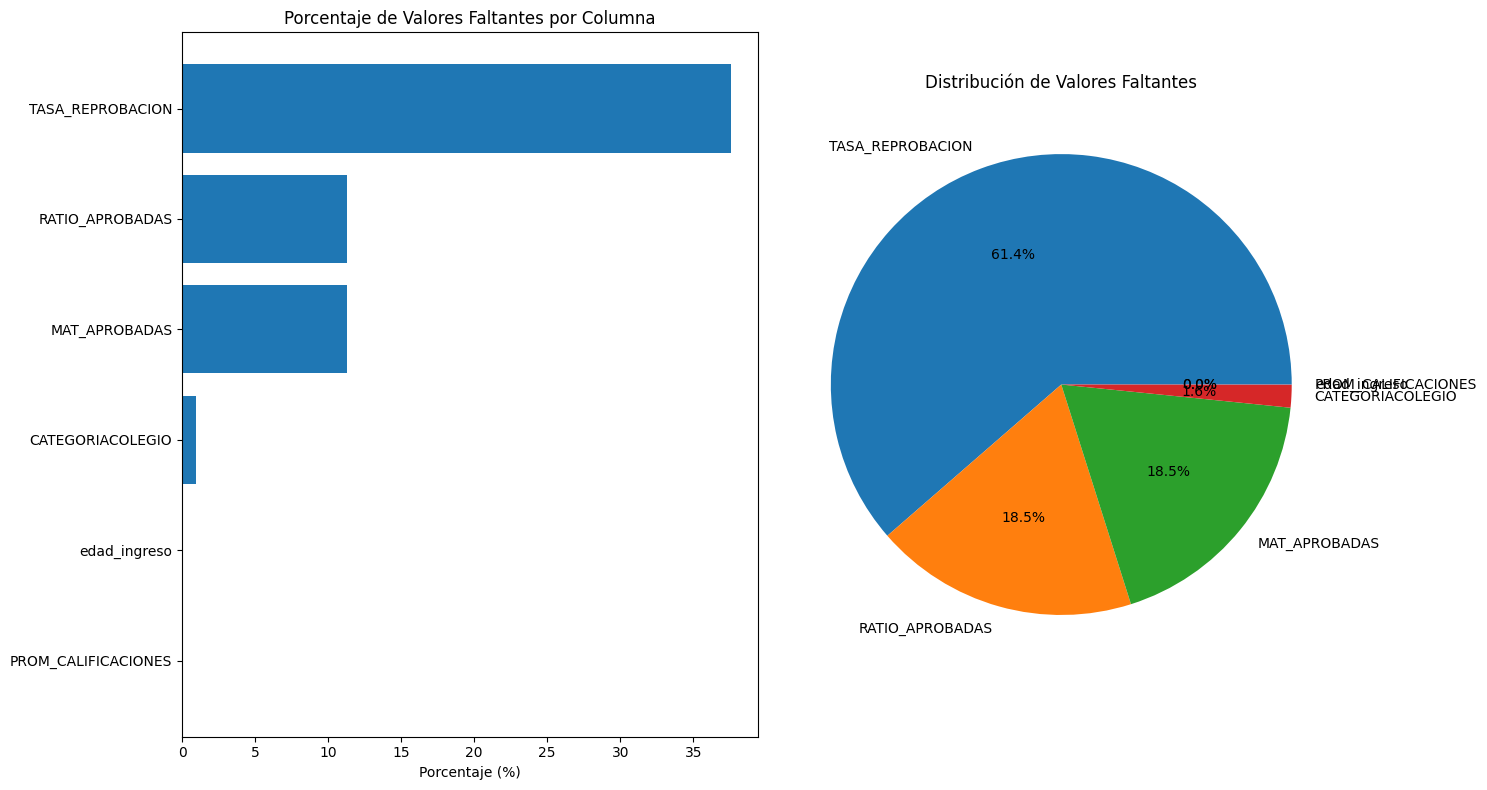


📈 RESUMEN:
• Total de registros: 332,359
• Columnas con valores faltantes: 6
• Porcentaje promedio de completitud: 98.39%


In [423]:
# 1. ANÁLISIS DE VALORES FALTANTES
print("="*80)
print("📊 ANÁLISIS DE VALORES FALTANTES")
print("="*80)

missing_analysis = df_eda.isnull().sum()
missing_percent = (missing_analysis / len(df_eda)) * 100

print("Cantidad total de las columnas:", len(df_eda.columns))

missing_df = pd.DataFrame({
    'Columna': missing_analysis.index,
    'Valores_Faltantes': missing_analysis.values,
    'Porcentaje': missing_percent.values
}).sort_values('Porcentaje', ascending=False)

print("Cantidad de columnas faltantes:", (missing_df['Valores_Faltantes'] > 0).sum())

print(missing_df[missing_df['Valores_Faltantes'] > 0])

# Visualización de valores faltantes
plt.figure(figsize=(15, 8))
missing_data = missing_df[missing_df['Valores_Faltantes'] > 0]

if len(missing_data) > 0:
    plt.subplot(1, 2, 1)
    plt.barh(missing_data['Columna'], missing_data['Porcentaje'])
    plt.title('Porcentaje de Valores Faltantes por Columna')
    plt.xlabel('Porcentaje (%)')
    plt.gca().invert_yaxis()
    
    plt.subplot(1, 2, 2)
    plt.pie(missing_data['Valores_Faltantes'], labels=missing_data['Columna'], autopct='%1.1f%%')
    plt.title('Distribución de Valores Faltantes')
else:
    plt.text(0.5, 0.5, 'No hay valores faltantes en el dataset', 
             horizontalalignment='center', verticalalignment='center', fontsize=16)
    plt.title('Estado de Valores Faltantes')

plt.tight_layout()
plt.show()

print(f"\n📈 RESUMEN:")
print(f"• Total de registros: {len(df_eda):,}")
print(f"• Columnas con valores faltantes: {len(missing_data)}")
print(f"• Porcentaje promedio de completitud: {100 - missing_percent.mean():.2f}%")

In [424]:
# Identificar variables categóricas y numéricas
categorical_cols = []
numerical_cols = []

for col in existing_columns:
    if df_eda[col].dtype == 'object' or df_eda[col].nunique() <= 20:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print(f"Variables categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"Variables numéricas ({len(numerical_cols)}): {numerical_cols}")

Variables categóricas (27): ['TIPOCOLEGIO', 'CATEGORIACOLEGIO', 'BECACOLEGIO', 'COD_MATERIA_ACAD_MO', 'TIENEDISCAPACIDAD', 'TIPODISCAPACIDAD', 'ESTADOCIVIL', 'OTROSIDIOMAS', 'NUMERO_IDIOMAS', 'NIVELINGLES', 'TIEMPOPROMEDIOLLEGARESPOL', 'VECESBUSENTRADA', 'NIVELINSTRUCCIONPADRE', 'NIVELINSTRUCCIONMADRE', 'ESTADOCIVILPADRES', 'FAMILIARDISCAPACIDAD', 'FAMILIARENFERMEDAD', 'TIPOPARROQUIA', 'VIVEGRUPOFAMILIAR', 'CANTIDADCUARTOS', 'CANTIDADBANIO', 'LOG_CANT_MAT', 'MUY_FACIL', 'FACIL', 'MODERADA', 'DIFICIL', 'MUY_DIFICIL']
Variables numéricas (9): ['LOG_GASTOS_RUBRO', 'VEZ_x_DIFICULTAD', 'RATIO_APROBADAS', 'TASA_REPROBACION', 'GPA_CUADRADO', 'edad_ingreso', 'PROM_CALIFICACIONES', 'MAT_APROBADAS', 'TERMINOS_REGISTRADOS']


📊 ANÁLISIS DE VARIABLES CATEGÓRICAS


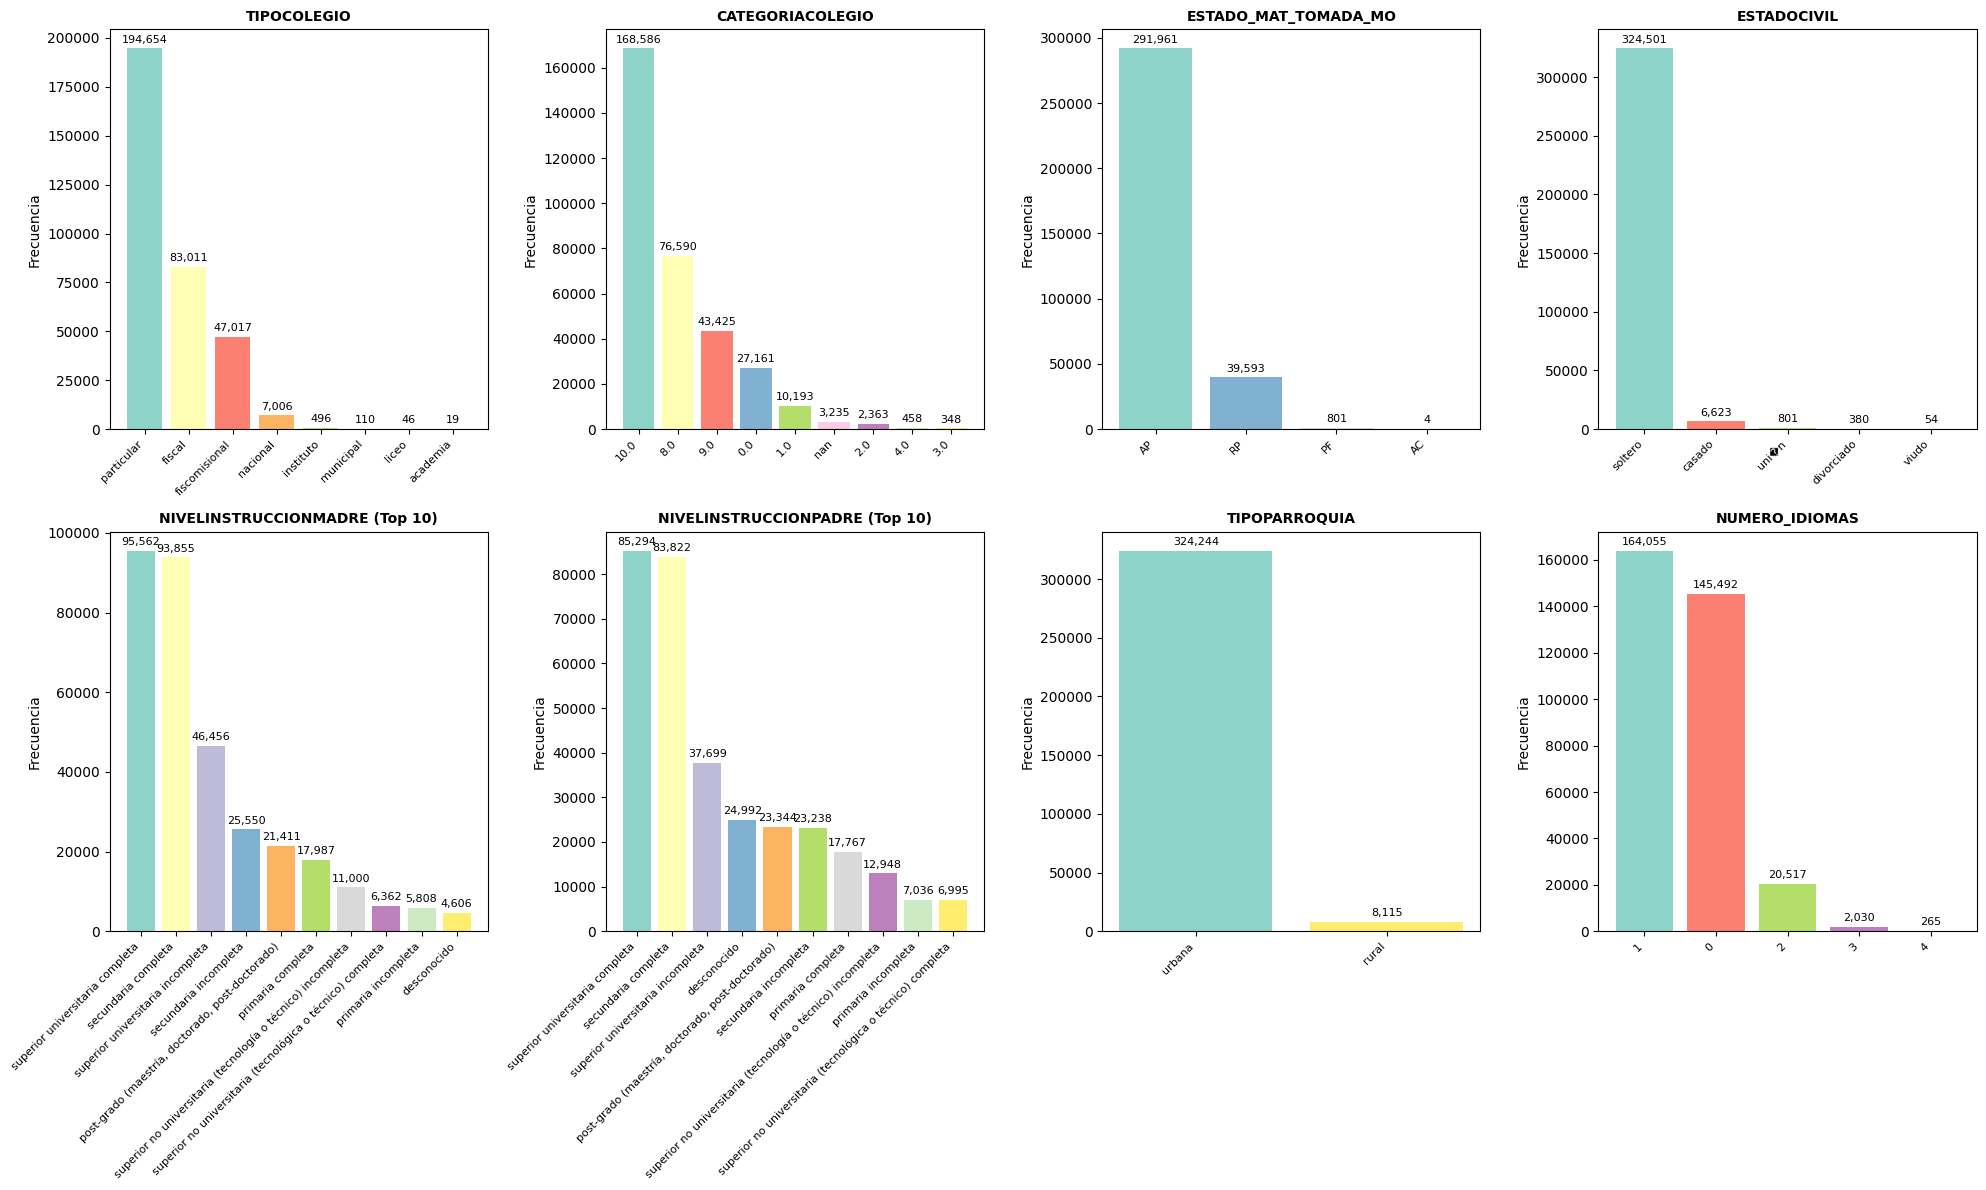


📋 ESTADÍSTICAS DETALLADAS:

🔹 TIPOCOLEGIO:
   1. particular: 194,654 (58.57%)
   2. fiscal: 83,011 (24.98%)
   3. fiscomisional: 47,017 (14.15%)
   4. nacional: 7,006 (2.11%)
   5. instituto: 496 (0.15%)
   ... y 3 categorías más
   Total valores únicos: 8
   Valores nulos: 0

🔹 CATEGORIACOLEGIO:
   1. 10.0: 168,586 (50.72%)
   2. 8.0: 76,590 (23.04%)
   3. 9.0: 43,425 (13.07%)
   4. 0.0: 27,161 (8.17%)
   5. 1.0: 10,193 (3.07%)
   ... y 4 categorías más
   Total valores únicos: 8
   Valores nulos: 3,235

🔹 ESTADO_MAT_TOMADA_MO:
   1. AP: 291,961 (87.85%)
   2. RP: 39,593 (11.91%)
   3. PF: 801 (0.24%)
   4. AC: 4 (0.00%)
   Total valores únicos: 4
   Valores nulos: 0

🔹 ESTADOCIVIL:
   1. soltero: 324,501 (97.64%)
   2. casado: 6,623 (1.99%)
   3. uni�n: 801 (0.24%)
   4. divorciado: 380 (0.11%)
   5. viudo: 54 (0.02%)
   Total valores únicos: 5
   Valores nulos: 0


In [425]:
# 2. ANÁLISIS DE VARIABLES CATEGÓRICAS
print("="*80)
print("📊 ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

# Análisis de las principales variables categóricas
# ESTADO_MAT_TOMADA_MO, TIENEDISCAPACIDAD
key_categorical = ['TIPOCOLEGIO', 'CATEGORIACOLEGIO', 'ESTADO_MAT_TOMADA_MO', 'ESTADOCIVIL', 
                  'NIVELINSTRUCCIONMADRE', 'NIVELINSTRUCCIONPADRE', 'TIPOPARROQUIA', 'NUMERO_IDIOMAS']

fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(key_categorical):
    if col in df_eda.columns:
        # Contar valores y limpiar NaN, si incluye NaN usar dropna=False
        value_counts = df_eda[col].value_counts(dropna=False)
        
        # Tomar solo los top 10 para evitar sobrecarga visual
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
            title_suffix = " (Top 10)"
        else:
            title_suffix = ""
        
        # Crear gráfico de barras
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                          color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
        axes[i].set_title(f'{col}{title_suffix}', fontweight='bold', fontsize=10)
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=8)
        axes[i].set_ylabel('Frecuencia')
        
        # Agregar valores encima de las barras
        for j, v in enumerate(value_counts.values):
            axes[i].text(j, v + max(value_counts.values)*0.01, f'{v:,}', 
                        ha='center', va='bottom', fontsize=8)

# Ocultar axes vacíos
for i in range(len(key_categorical), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Estadísticas detalladas de variables categóricas importantes
print("\n📋 ESTADÍSTICAS DETALLADAS:")
for col in key_categorical[:4]:  # Mostrar solo las primeras 4
    if col in df_eda.columns:
        print(f"\n🔹 {col}:")
        counts = df_eda[col].value_counts(dropna=False)
        percentages = df_eda[col].value_counts(normalize=True, dropna=False) * 100
        
        for idx, (value, count) in enumerate(counts.head(5).items()):
            percentage = percentages[value]
            print(f"   {idx+1}. {value}: {count:,} ({percentage:.2f}%)")
        
        if len(counts) > 5:
            print(f"   ... y {len(counts)-5} categorías más")
        
        print(f"   Total valores únicos: {df_eda[col].nunique()}")
        print(f"   Valores nulos: {df_eda[col].isnull().sum():,}")

📊 ANÁLISIS DE VARIABLES NUMÉRICAS
📈 ESTADÍSTICAS DESCRIPTIVAS:
       LOG_GASTOS_RUBRO  VEZ_x_DIFICULTAD  RATIO_APROBADAS  TASA_REPROBACION  \
count     332359.000000     332359.000000    294729.000000     207495.000000   
mean           5.328731         56.247530        -0.235406          0.237469   
std            0.615912         41.000391         0.224017          0.212819   
min            1.163151          0.448900        -2.708050          0.000000   
25%            4.875197         39.312900        -0.307485          0.108182   
50%            5.265278         47.334400        -0.182322          0.163214   
75%            5.707940         55.502500        -0.087011          0.279500   
max            9.733944        638.067600        -0.013423          1.495000   

        GPA_CUADRADO   edad_ingreso  PROM_CALIFICACIONES  MAT_APROBADAS  \
count  332359.000000  332339.000000        332347.000000  294729.000000   
mean       51.136699      19.030917             7.215915      21.0

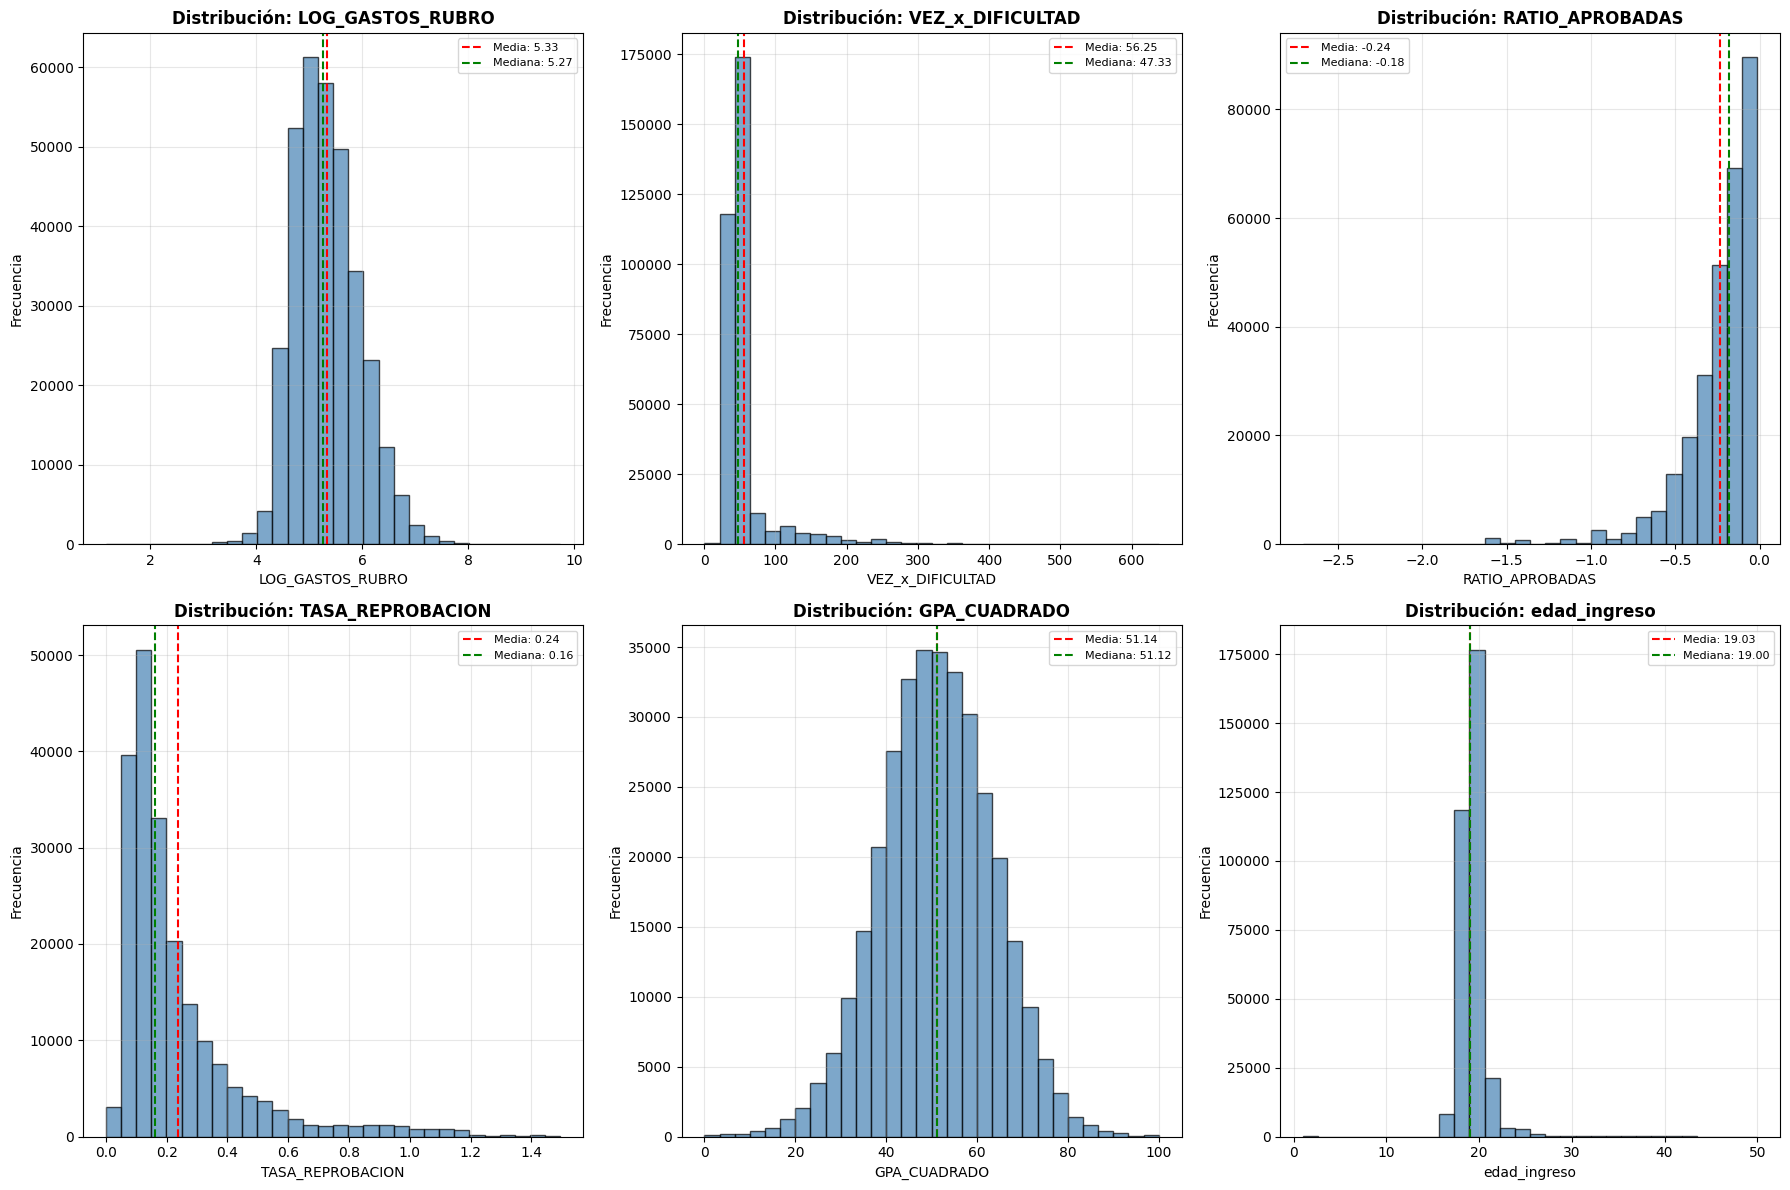


🔍 ANÁLISIS DE OUTLIERS:

🔹 LOG_GASTOS_RUBRO:
   Rango normal: [3.63, 6.96]
   Outliers detectados: 3,749 (1.13%)
   Valor mín outlier: 1.16
   Valor máx outlier: 9.73

🔹 VEZ_x_DIFICULTAD:
   Rango normal: [15.03, 79.79]
   Outliers detectados: 29,490 (8.87%)
   Valor mín outlier: 0.45
   Valor máx outlier: 638.07

🔹 RATIO_APROBADAS:
   Rango normal: [-0.64, 0.24]
   Outliers detectados: 14,713 (4.99%)
   Valor mín outlier: -2.71
   Valor máx outlier: -0.64

🔹 TASA_REPROBACION:
   Rango normal: [-0.15, 0.54]
   Outliers detectados: 17,214 (8.30%)
   Valor mín outlier: 0.54
   Valor máx outlier: 1.50

🔹 GPA_CUADRADO:
   Rango normal: [17.86, 84.64]
   Outliers detectados: 3,049 (0.92%)
   Valor mín outlier: 0.00
   Valor máx outlier: 100.00

🔹 edad_ingreso:
   Rango normal: [16.50, 20.50]
   Outliers detectados: 29,151 (8.77%)
   Valor mín outlier: 1.00
   Valor máx outlier: 50.00

🔹 PROM_CALIFICACIONES:
   Rango normal: [4.94, 9.58]
   Outliers detectados: 5,571 (1.68%)
   Valor mín ou

In [426]:
# 3. ANÁLISIS DE VARIABLES NUMÉRICAS
print("="*80)
print("📊 ANÁLISIS DE VARIABLES NUMÉRICAS")
print("="*80)

# Incluir también algunas variables que son numéricas pero podrían estar como categóricas
numeric_analysis_cols = numerical_cols + ['CANTIDADCUARTOS', 'CANTIDADBANIO', 'VECESBUSENTRADA', 'TERMINOS_REGISTRADOS']

# Estadísticas descriptivas
print("📈 ESTADÍSTICAS DESCRIPTIVAS:")
numeric_stats = df_eda[numeric_analysis_cols].describe()
print(numeric_stats)

# Visualización de distribuciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_analysis_cols[:6]):
    if col in df_eda.columns:
        # Limpiar valores nulos para el análisis
        data_clean = df_eda[col].dropna()
        
        # Histograma
        axes[i].hist(data_clean, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
        axes[i].set_title(f'Distribución: {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(True, alpha=0.3)
        
        # Agregar estadísticas al gráfico
        mean_val = data_clean.mean()
        median_val = data_clean.median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
        axes[i].legend(fontsize=8)

# Ocultar axes vacíos
for i in range(len(numeric_analysis_cols), 6):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis de outliers usando IQR
print("\n🔍 ANÁLISIS DE OUTLIERS:")
for col in numeric_analysis_cols:
    if col in df_eda.columns:
        data_clean = df_eda[col].dropna()
        Q1 = data_clean.quantile(0.25)
        Q3 = data_clean.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
        
        print(f"\n🔹 {col}:")
        print(f"   Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"   Outliers detectados: {len(outliers):,} ({len(outliers)/len(data_clean)*100:.2f}%)")
        if len(outliers) > 0:
            print(f"   Valor mín outlier: {outliers.min():.2f}")
            print(f"   Valor máx outlier: {outliers.max():.2f}")

📊 ANÁLISIS DE CORRELACIÓN CON GPA


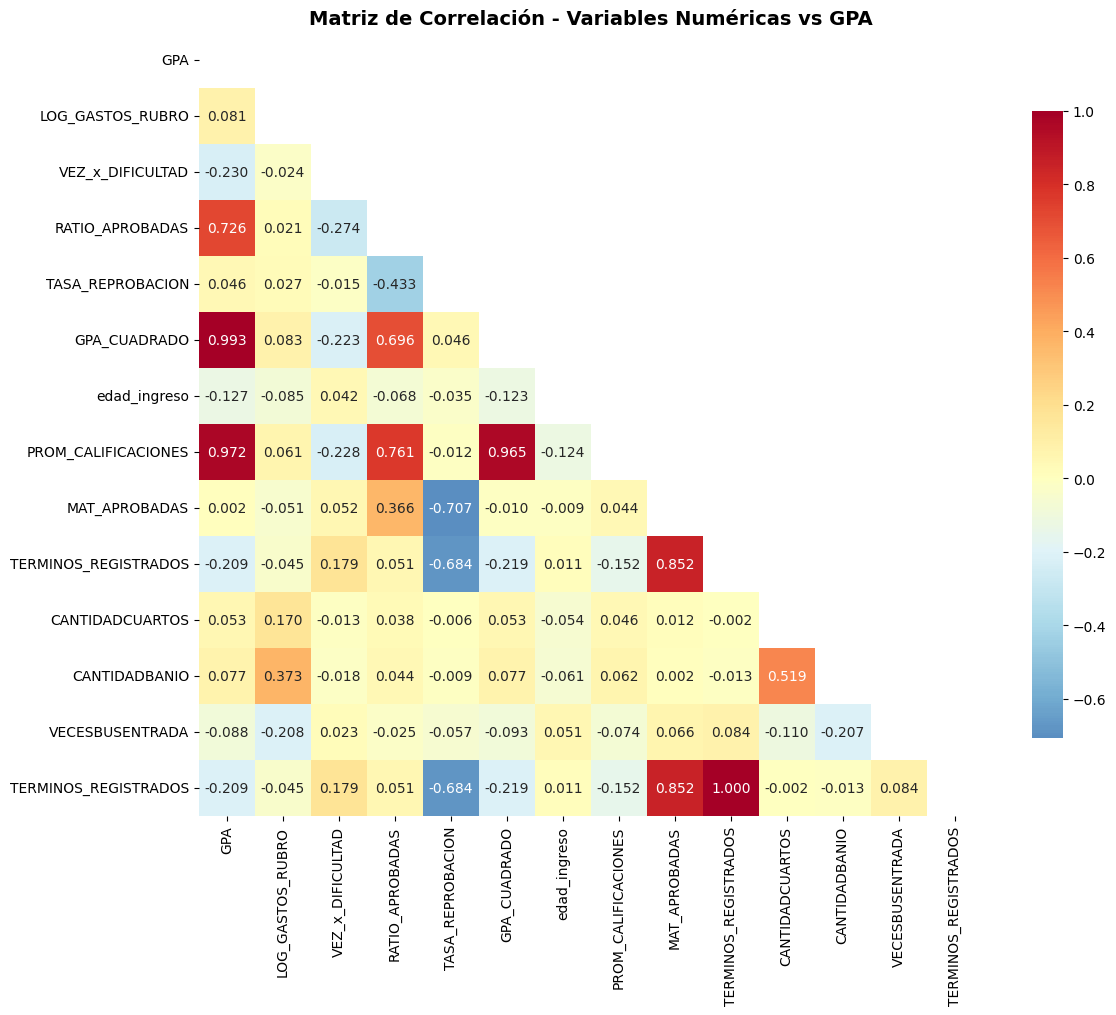

🔗 CORRELACIONES CON GPA:
   GPA_CUADRADO: 0.9925 (Fuerte Positiva)
   PROM_CALIFICACIONES: 0.9724 (Fuerte Positiva)
   RATIO_APROBADAS: 0.7260 (Fuerte Positiva)
   VEZ_x_DIFICULTAD: -0.2297 (Débil Negativa)
   TERMINOS_REGISTRADOS: -0.2087 (Débil Negativa)
   TERMINOS_REGISTRADOS: -0.2087 (Débil Negativa)
   edad_ingreso: -0.1274 (Débil Negativa)
   VECESBUSENTRADA: -0.0879 (Débil Negativa)
   LOG_GASTOS_RUBRO: 0.0811 (Débil Positiva)
   CANTIDADBANIO: 0.0768 (Débil Positiva)
   CANTIDADCUARTOS: 0.0529 (Débil Positiva)
   TASA_REPROBACION: 0.0464 (Débil Positiva)
   MAT_APROBADAS: 0.0018 (Débil Positiva)

📊 ANÁLISIS POR ESTADO ACADÉMICO:
                       count   mean    std   min    max
ESTADO_MAT_TOMADA_MO                                   
AC                         4  6.735  0.283  6.48   6.98
AP                    291961  7.184  0.863  0.00  10.00
PF                       801  6.355  1.159  1.09  10.00
RP                     39593  6.439  0.943  0.00  10.00


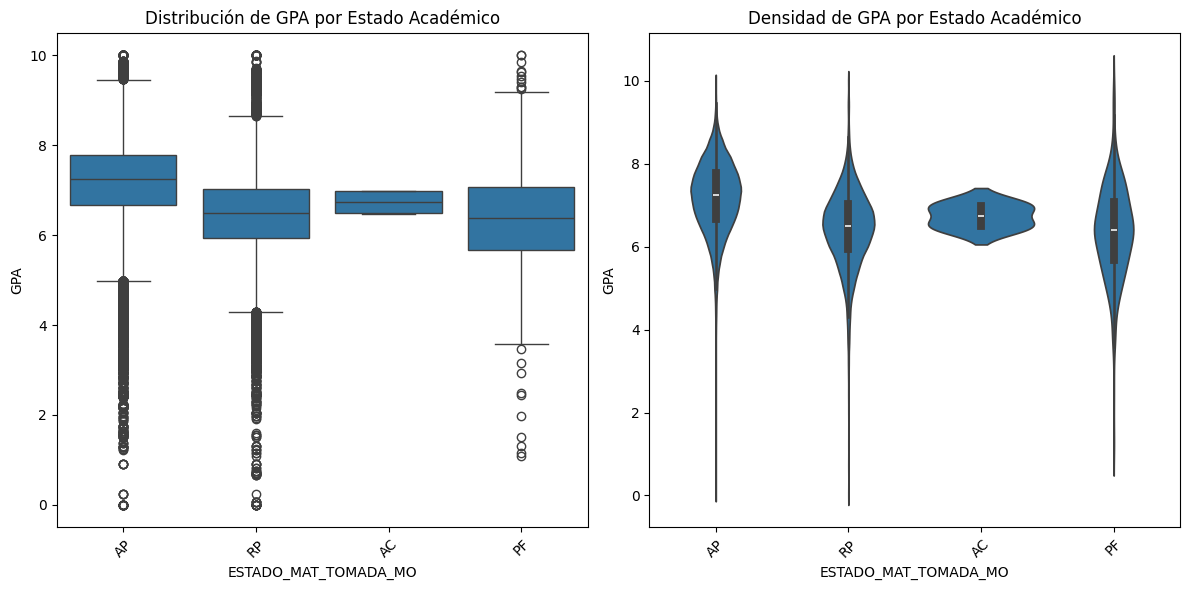

In [427]:
# 4. CORRELACIÓN ENTRE VARIABLES NUMÉRICAS Y GPA
print("="*80)
print("📊 ANÁLISIS DE CORRELACIÓN CON GPA")
print("="*80)

# Seleccionar variables numéricas para análisis de correlación
correlation_cols = ['GPA'] + numeric_analysis_cols

# Calcular matriz de correlación
correlation_matrix = df_eda[correlation_cols].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables Numéricas vs GPA', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# Correlaciones específicas con GPA
print("🔗 CORRELACIONES CON GPA:")
gpa_correlations = correlation_matrix['GPA'].drop('GPA').sort_values(key=abs, ascending=False)
for var, corr in gpa_correlations.items():
    if not pd.isna(corr):
        strength = "Fuerte" if abs(corr) > 0.5 else "Moderada" if abs(corr) > 0.3 else "Débil"
        direction = "Positiva" if corr > 0 else "Negativa"
        print(f"   {var}: {corr:.4f} ({strength} {direction})")

# Análisis por ESTADO_MAT_TOMADA_MO
print(f"\n📊 ANÁLISIS POR ESTADO ACADÉMICO:")
estado_gpa = df_eda.groupby('ESTADO_MAT_TOMADA_MO')['GPA'].agg(['count', 'mean', 'std', 'min', 'max']).round(3)
print(estado_gpa)

# Boxplot de GPA por estado académico
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_eda_clean = df_eda.dropna(subset=['GPA'])
sns.boxplot(data=df_eda_clean, x='ESTADO_MAT_TOMADA_MO', y='GPA')
plt.title('Distribución de GPA por Estado Académico')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(data=df_eda_clean, x='ESTADO_MAT_TOMADA_MO', y='GPA')
plt.title('Densidad de GPA por Estado Académico')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [428]:
# 5. LABEL ENCODING Y PREPARACIÓN DE DATOS
print("="*80)
print("🔧 LABEL ENCODING Y PREPARACIÓN DE DATOS")
print("="*80)

# Crear una copia del dataset para encoding
df_encoded = df_eda.copy()

# Inicializar diccionario para almacenar los label encoders
label_encoders = {}
encoding_mappings = {}

# Lista de columnas categóricas para encodear
categorical_to_encode = [col for col in categorical_cols if col in df_encoded.columns]

print("🔄 Aplicando Label Encoding a variables categóricas...")

# Aplicar label encoding a cada variable categórica
for col in categorical_to_encode:
    if col in df_encoded.columns:
        print(f"   Procesando: {col}")
        
        # Crear una copia de la columna para trabajar
        col_data = df_encoded[col].astype(str)
        
        # Reemplazar valores nulos con 'Unknown'
        col_data = col_data.replace('nan', 'Unknown').fillna('Unknown')
        
        # Aplicar label encoding
        le = LabelEncoder()
        df_encoded[f'{col}_encoded'] = le.fit_transform(col_data)
        
        # Guardar el encoder y el mapeo
        label_encoders[col] = le
        encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
        
        print(f"      Valores únicos: {len(le.classes_)} -> Rango encoded: [0, {len(le.classes_)-1}]")

# Lista de todas las columnas encoded
encoded_columns = [f'{col}_encoded' for col in categorical_to_encode]

print(f"\n✅ Label Encoding completado para {len(encoded_columns)} variables")
print(f"📊 Dimensiones del dataset encoded: {df_encoded.shape}")

# Mostrar algunos mapeos importantes
print(f"\n📋 MAPEOS DE ENCODING (muestras):")
important_cols = ['TIPOCOLEGIO', 'TIENEDISCAPACIDAD', 'ESTADOCIVIL', 'POSEETARJETACREDITO']
for col in important_cols:
    if col in encoding_mappings:
        print(f"\n🔹 {col}:")
        mapping = encoding_mappings[col]
        for i, (original, encoded) in enumerate(mapping.items()):
            if i < 5:  # Mostrar solo los primeros 5
                print(f"   '{original}' -> {encoded}")
            elif i == 5:
                print(f"   ... y {len(mapping)-5} valores más")
                break

🔧 LABEL ENCODING Y PREPARACIÓN DE DATOS
🔄 Aplicando Label Encoding a variables categóricas...
   Procesando: TIPOCOLEGIO
      Valores únicos: 8 -> Rango encoded: [0, 7]
   Procesando: CATEGORIACOLEGIO
      Valores únicos: 9 -> Rango encoded: [0, 8]
   Procesando: BECACOLEGIO
      Valores únicos: 28 -> Rango encoded: [0, 27]
   Procesando: COD_MATERIA_ACAD_MO
      Valores únicos: 689 -> Rango encoded: [0, 688]
   Procesando: TIENEDISCAPACIDAD
      Valores únicos: 2 -> Rango encoded: [0, 1]
   Procesando: TIPODISCAPACIDAD
      Valores únicos: 7 -> Rango encoded: [0, 6]
   Procesando: ESTADOCIVIL
      Valores únicos: 5 -> Rango encoded: [0, 4]
   Procesando: OTROSIDIOMAS
      Valores únicos: 2 -> Rango encoded: [0, 1]
   Procesando: NUMERO_IDIOMAS
      Valores únicos: 5 -> Rango encoded: [0, 4]
   Procesando: NIVELINGLES
      Valores únicos: 5 -> Rango encoded: [0, 4]
   Procesando: TIEMPOPROMEDIOLLEGARESPOL
      Valores únicos: 6 -> Rango encoded: [0, 5]
   Procesando: VECESBU

📊 MATRIZ DE CORRELACIÓN COMPLETA (VARIABLES ENCODED)
Variables para análisis de correlación: 41
Registros para análisis: 332,359
Columnas analizadas: 41
🔍 Matriz muy grande, mostrando solo correlaciones principales...
🔗 TOP 20 CORRELACIONES CON GPA:

Variable                            Correlación  Fuerza     Dirección
----------------------------------------------------------------------
GPA_CUADRADO                          0.9925    Fuerte     Positiva
PROM_CALIFICACIONES                   0.9724    Fuerte     Positiva
RATIO_APROBADAS                       0.7260    Fuerte     Positiva
VEZ_x_DIFICULTAD                     -0.2297    Débil      Negativa
LOG_CANT_MAT_encoded                  0.2240    Débil      Positiva
TERMINOS_REGISTRADOS                 -0.2087    Débil      Negativa
TERMINOS_REGISTRADOS                 -0.2087    Débil      Negativa
DIFICIL_encoded                       0.1519    Débil      Positiva
edad_ingreso                         -0.1274    Débil      Negat

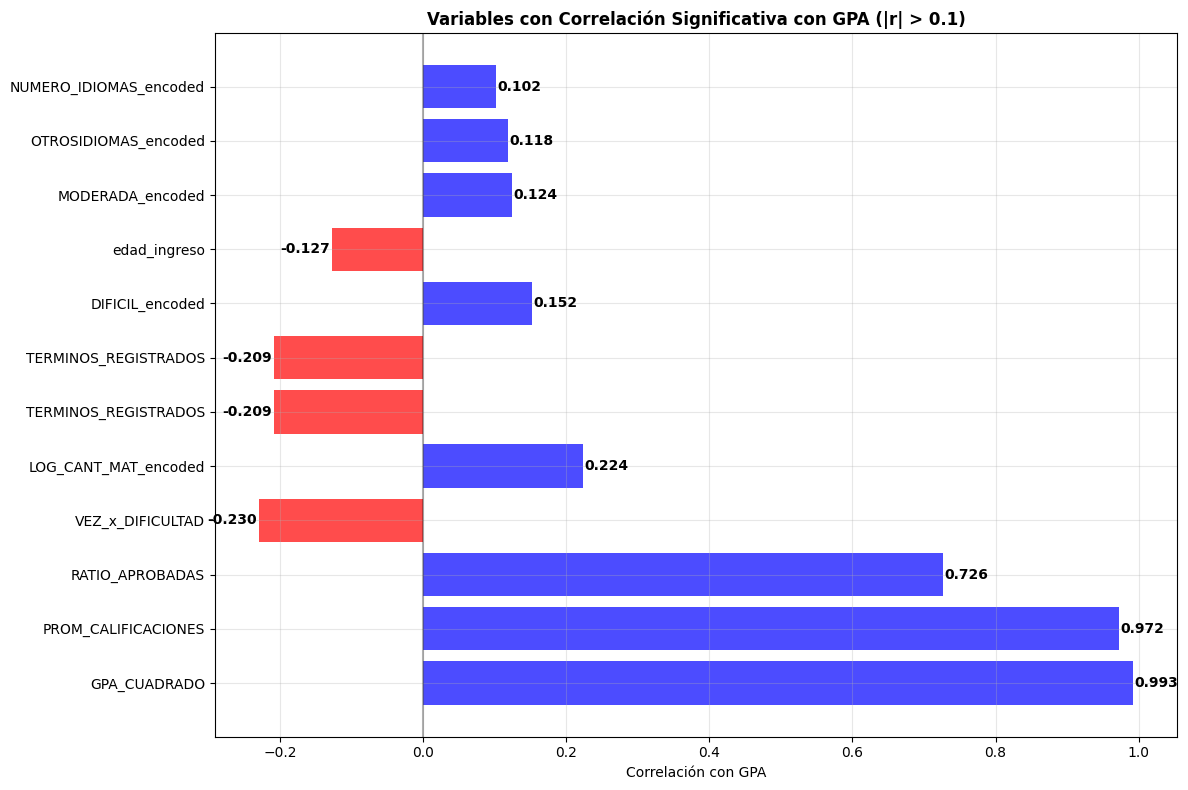

In [429]:
# 6. MATRIZ DE CORRELACIÓN COMPLETA CON VARIABLES ENCODED
print("="*80)
print("📊 MATRIZ DE CORRELACIÓN COMPLETA (VARIABLES ENCODED)")
print("="*80)

# Seleccionar todas las variables numéricas y encoded para la matriz de correlación
analysis_columns = (
    numeric_analysis_cols + 
    encoded_columns + 
    ['GPA']
)

# Filtrar solo las columnas que existen en el dataframe
available_analysis_cols = [col for col in analysis_columns if col in df_encoded.columns]

print(f"Variables para análisis de correlación: {len(available_analysis_cols)}")

# Crear un subset para el análisis de correlación (sin valores nulos en GPA)
df_correlation = df_encoded[available_analysis_cols].dropna(subset=['GPA'])

print(f"Registros para análisis: {df_correlation.shape[0]:,}")
print(f"Columnas analizadas: {df_correlation.shape[1]}")

# Calcular matriz de correlación
correlation_matrix_full = df_correlation.corr()

# Visualizar matriz de correlación completa (solo si no es muy grande)
if len(available_analysis_cols) <= 15:
    plt.figure(figsize=(16, 14))
    sns.heatmap(correlation_matrix_full, annot=True, cmap='RdYlBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8}, 
                xticklabels=True, yticklabels=True)
    plt.title('Matriz de Correlación Completa - Variables Encoded', fontweight='bold', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    # Si hay muchas variables, mostrar solo las correlaciones con GPA
    print("🔍 Matriz muy grande, mostrando solo correlaciones principales...")

# Correlaciones específicas con GPA (top 20)
print("🔗 TOP 20 CORRELACIONES CON GPA:")
gpa_correlations_full = correlation_matrix_full['GPA'].drop('GPA').sort_values(key=abs, ascending=False)

print(f"\n{'Variable':<35} {'Correlación':<12} {'Fuerza':<10} {'Dirección'}")
print("-" * 70)

for i, (var, corr) in enumerate(gpa_correlations_full.head(20).items()):
    if not pd.isna(corr):
        if abs(corr) > 0.5:
            strength = "Fuerte"
        elif abs(corr) > 0.3:
            strength = "Moderada"
        elif abs(corr) > 0.1:
            strength = "Débil"
        else:
            strength = "Muy débil"
        
        direction = "Positiva" if corr > 0 else "Negativa"
        print(f"{var:<35} {corr:>8.4f}    {strength:<10} {direction}")

# Análisis de las correlaciones más fuertes
strongest_correlations = gpa_correlations_full[abs(gpa_correlations_full) > 0.1]
print(f"\n📈 CORRELACIONES SIGNIFICATIVAS (|r| > 0.1): {len(strongest_correlations)}")

if len(strongest_correlations) > 0:
    # Visualizar las correlaciones más fuertes
    plt.figure(figsize=(12, 8))
    colors = ['red' if x < 0 else 'blue' for x in strongest_correlations.values]
    bars = plt.barh(range(len(strongest_correlations)), strongest_correlations.values, color=colors, alpha=0.7)
    plt.yticks(range(len(strongest_correlations)), strongest_correlations.index)
    plt.xlabel('Correlación con GPA')
    plt.title('Variables con Correlación Significativa con GPA (|r| > 0.1)', fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    
    # Agregar valores a las barras
    for i, (bar, value) in enumerate(zip(bars, strongest_correlations.values)):
        plt.text(value + (0.002 if value > 0 else -0.002), i, f'{value:.3f}', 
                va='center', ha='left' if value > 0 else 'right', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron correlaciones significativas (|r| > 0.1) con GPA")

In [430]:
# 7. ANÁLISIS AVANZADO Y RESUMEN EJECUTIVO
print("="*80)
print("📊 RESUMEN EJECUTIVO DEL EDA")
print("="*80)

# Crear resumen estadístico
print("📈 RESUMEN ESTADÍSTICO DEL DATASET:")
print(f"• Total de registros: {df_encoded.shape[0]:,}")
print(f"• Total de variables analizadas: {len(existing_columns)}")
print(f"• Variables categóricas: {len(categorical_cols)}")
print(f"• Variables numéricas: {len(numerical_cols)}")
print(f"• Registros con GPA válido: {df_correlation.shape[0]:,} ({df_correlation.shape[0]/df_encoded.shape[0]*100:.1f}%)")

print(f"\n🎯 PRINCIPALES HALLAZGOS:")

# 1. Análisis de completitud de datos
completitud_promedio = 100 - missing_percent.mean()
print(f"• Completitud promedio de datos: {completitud_promedio:.1f}%")

# Variables con más datos faltantes
top_missing = missing_df[missing_df['Valores_Faltantes'] > 0].head(3)
if len(top_missing) > 0:
    print(f"• Variables con más datos faltantes:")
    for _, row in top_missing.iterrows():
        print(f"  - {row['Columna']}: {row['Porcentaje']:.1f}% faltante")

# 2. Distribuciones importantes
print(f"\n🏫 CARACTERÍSTICAS PREDOMINANTES:")
print(f"• Tipo de colegio más común: {df_eda['TIPOCOLEGIO'].mode().iloc[0]} ({df_eda['TIPOCOLEGIO'].value_counts().iloc[0]/len(df_eda)*100:.1f}%)")
print(f"• Estado civil predominante: {df_eda['ESTADOCIVIL'].mode().iloc[0]} ({df_eda['ESTADOCIVIL'].value_counts().iloc[0]/len(df_eda)*100:.1f}%)")
print(f"• Estudiantes con discapacidad: {(df_eda['TIENEDISCAPACIDAD'] == 'S').sum():,} ({(df_eda['TIENEDISCAPACIDAD'] == 'S').sum()/len(df_eda)*100:.2f}%)")

# 3. Correlaciones importantes
print(f"\n🔗 CORRELACIONES CON GPA:")
if len(strongest_correlations) > 0:
    for i, (var, corr) in enumerate(strongest_correlations.head(5).items()):
        direction = "positiva" if corr > 0 else "negativa"
        print(f"• {var}: {corr:.3f} (correlación {direction})")
else:
    print("• No se encontraron correlaciones fuertes con GPA")

# 4. Análisis por estado académico
print(f"\n📚 RENDIMIENTO ACADÉMICO:")
gpa_por_estado = df_eda.groupby('ESTADO_MAT_TOMADA_MO')['GPA'].mean().dropna()
if len(gpa_por_estado) > 0:
    mejor_estado = gpa_por_estado.idxmax()
    peor_estado = gpa_por_estado.idxmin()
    print(f"• Mejor rendimiento: {mejor_estado} (GPA promedio: {gpa_por_estado[mejor_estado]:.2f})")
    print(f"• Menor rendimiento: {peor_estado} (GPA promedio: {gpa_por_estado[peor_estado]:.2f})")

# 5. Variables económicas
if 'ALIMENTACION' in df_eda.columns and 'TRANSPORTE' in df_eda.columns:
    print(f"\n💰 ASPECTOS ECONÓMICOS:")
    print(f"• Gasto promedio en alimentación: ${df_eda['ALIMENTACION'].mean():.0f}")
    print(f"• Gasto promedio en transporte: ${df_eda['TRANSPORTE'].mean():.0f}")
    gasto_total_promedio = df_eda['ALIMENTACION'].mean() + df_eda['TRANSPORTE'].mean()
    print(f"• Gasto total promedio (alimentación + transporte): ${gasto_total_promedio:.0f}")

print(f"\n🔍 RECOMENDACIONES PARA ANÁLISIS POSTERIORES:")
print("• Investigar las variables con alta correlación con GPA para modelos predictivos")
print("• Analizar en detalle las diferencias por tipo de colegio y su impacto en el rendimiento")
print("• Considerar imputación de datos faltantes en variables clave como IDIOMAS y NIVELINGLES")
print("• Explorar la relación entre variables económicas (alimentación/transporte) y rendimiento")
print("• Realizar análisis de clustering para identificar perfiles de estudiantes")

# Guardar dataset procesado para futuros análisis
print(f"\n💾 Dataset procesado disponible como 'df_encoded' con {df_encoded.shape[1]} columnas")
print("• Incluye variables originales + variables encoded")
print("• Listo para modelado de machine learning")
print("• Label encoders guardados en diccionario 'label_encoders'")

📊 RESUMEN EJECUTIVO DEL EDA
📈 RESUMEN ESTADÍSTICO DEL DATASET:
• Total de registros: 332,359
• Total de variables analizadas: 36
• Variables categóricas: 27
• Variables numéricas: 9
• Registros con GPA válido: 332,359 (100.0%)

🎯 PRINCIPALES HALLAZGOS:
• Completitud promedio de datos: 98.4%
• Variables con más datos faltantes:
  - TASA_REPROBACION: 37.6% faltante
  - RATIO_APROBADAS: 11.3% faltante
  - MAT_APROBADAS: 11.3% faltante

🏫 CARACTERÍSTICAS PREDOMINANTES:
• Tipo de colegio más común: particular (58.6%)
• Estado civil predominante: soltero (97.6%)
• Estudiantes con discapacidad: 0 (0.00%)

🔗 CORRELACIONES CON GPA:
• GPA_CUADRADO: 0.993 (correlación positiva)
• PROM_CALIFICACIONES: 0.972 (correlación positiva)
• RATIO_APROBADAS: 0.726 (correlación positiva)
• VEZ_x_DIFICULTAD: -0.230 (correlación negativa)
• LOG_CANT_MAT_encoded: 0.224 (correlación positiva)

📚 RENDIMIENTO ACADÉMICO:
• Mejor rendimiento: AP (GPA promedio: 7.18)
• Menor rendimiento: PF (GPA promedio: 6.35)

🔍 RE

🎯 ANÁLISIS DE RELACIONES CATEGÓRICAS Y MATRIZ DE CONFUSIÓN
📊 ANÁLISIS DE TABLAS DE CONTINGENCIA:

🎯 Distribución de Estados Académicos por Categoría de GPA (%):
ESTADO_category   Actividad Complementaria  Aprobado  Perdida por Faltas  \
GPA_category                                                               
Bajo (0-6)                             0.0      68.5                 0.8   
Medio (6-7)                            0.0      82.8                 0.3   
Alto (7-8)                             0.0      93.4                 0.1   
Excelente (8-10)                       0.0      97.5                 0.1   

ESTADO_category   Reprobado  
GPA_category                 
Bajo (0-6)             30.7  
Medio (6-7)            16.9  
Alto (7-8)              6.5  
Excelente (8-10)        2.5  


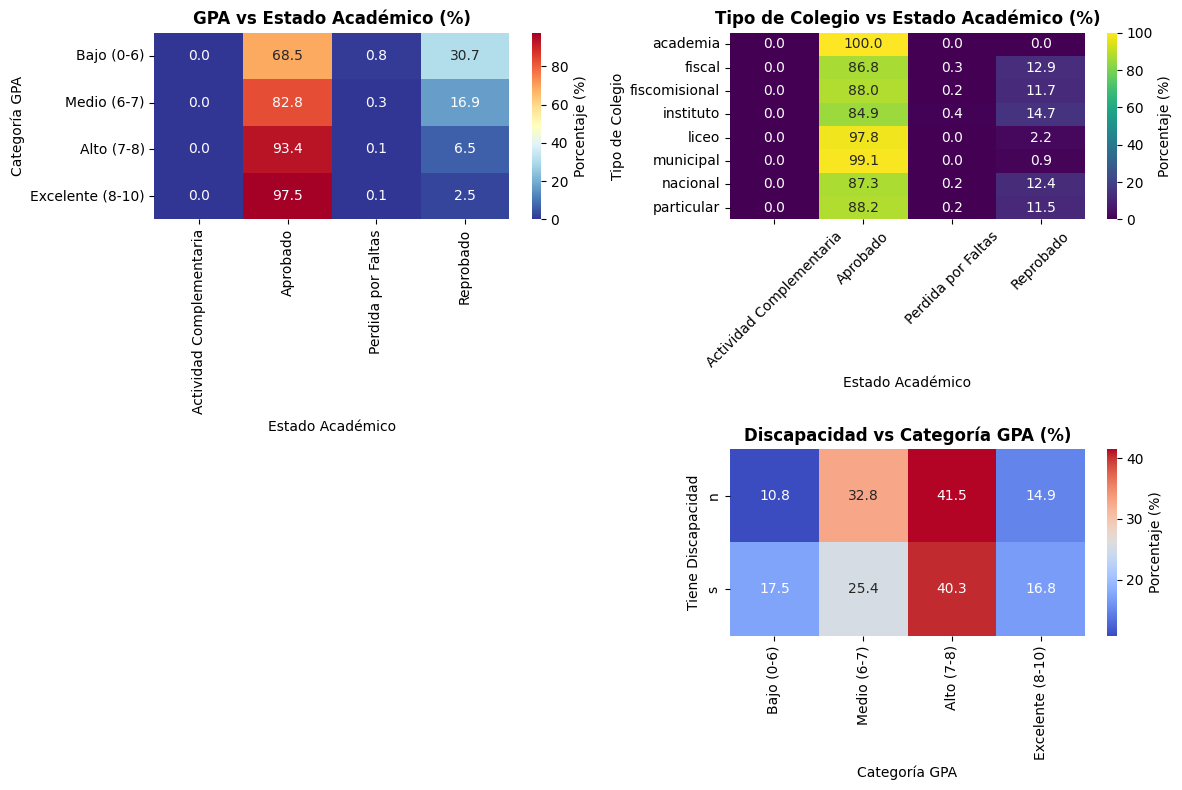


🔬 PRUEBAS DE INDEPENDENCIA (CHI-CUADRADO):
H0: Las variables son independientes
H1: Las variables están relacionadas
------------------------------------------------------------
Tipo de Colegio vs Estado Académico:
  Chi² = 180.693, p-valor = 0.000000 ***
  Resultado: Variables DEPENDIENTES

Discapacidad vs Categoría GPA:
  Chi² = 85.821, p-valor = 0.000000 ***
  Resultado: Variables DEPENDIENTES


📋 INTERPRETACIÓN:
* p < 0.05: Variables relacionadas (rechazar H0)
** p < 0.01: Relación moderadamente significativa
*** p < 0.001: Relación altamente significativa

🎯 MATRICES DE CONFUSIÓN ESPECÍFICAS:

📚 Matriz: Tipo de Colegio vs Categoría GPA (valores absolutos)
GPA_category   Bajo (0-6)  Medio (6-7)  Alto (7-8)  Excelente (8-10)     All
TIPOCOLEGIO                                                                 
academia               19            0           0                 0      19
fiscal               9390        29210       33109             11302   83011
fiscomisional        4

In [431]:
# 8. MATRIZ DE CONFUSIÓN Y ANÁLISIS CATEGÓRICO AVANZADO
print("="*80)
print("🎯 ANÁLISIS DE RELACIONES CATEGÓRICAS Y MATRIZ DE CONFUSIÓN")
print("="*80)

# Para una matriz de confusión necesitamos variables categóricas
# Vamos a crear una versión categorizada del GPA y hacer análisis cruzados

# Categorizar GPA en rangos
df_encoded['GPA_category'] = pd.cut(df_encoded['GPA'], 
                                   bins=[0, 6.0, 7.0, 8.0, 10.0], 
                                   labels=['Bajo (0-6)', 'Medio (6-7)', 'Alto (7-8)', 'Excelente (8-10)'],
                                   include_lowest=True)

# Categorizar ESTADO_MAT_TOMADA_MO para análisis
estado_map = {'AP': 'Aprobado', 'RP': 'Reprobado', 'PF': 'Perdida por Faltas', 'AC': 'Actividad Complementaria'}
df_encoded['ESTADO_category'] = df_encoded['ESTADO_MAT_TOMADA_MO'].map(estado_map).fillna('Otro')

# Análisis de tablas de contingencia y matrices de confusión
print("📊 ANÁLISIS DE TABLAS DE CONTINGENCIA:")

# 1. GPA vs Estado Académico
if not df_encoded['GPA_category'].isna().all():
    contingency_gpa_estado = pd.crosstab(df_encoded['GPA_category'], 
                                        df_encoded['ESTADO_category'], 
                                        normalize='index') * 100
    
    print("\n🎯 Distribución de Estados Académicos por Categoría de GPA (%):")
    print(contingency_gpa_estado.round(1))
    
    # Visualizar con heatmap
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.heatmap(contingency_gpa_estado, annot=True, fmt='.1f', cmap='RdYlBu_r', 
                cbar_kws={'label': 'Porcentaje (%)'})
    plt.title('GPA vs Estado Académico (%)', fontweight='bold')
    plt.ylabel('Categoría GPA')
    plt.xlabel('Estado Académico')

# 2. Tipo de Colegio vs Estado Académico
if 'TIPOCOLEGIO' in df_encoded.columns:
    contingency_colegio_estado = pd.crosstab(df_encoded['TIPOCOLEGIO'], 
                                           df_encoded['ESTADO_category'], 
                                           normalize='index') * 100
    
    plt.subplot(2, 2, 2)
    sns.heatmap(contingency_colegio_estado, annot=True, fmt='.1f', cmap='viridis',
                cbar_kws={'label': 'Porcentaje (%)'})
    plt.title('Tipo de Colegio vs Estado Académico (%)', fontweight='bold')
    plt.ylabel('Tipo de Colegio')
    plt.xlabel('Estado Académico')
    plt.xticks(rotation=45)

# 3. Análisis de variables socioeconómicas
if all(col in df_encoded.columns for col in ['POSEETARJETACREDITO', 'POSEETARJETADEBITO']):
    # Crear variable combinada de acceso financiero
    df_encoded['ACCESO_FINANCIERO'] = 'Sin acceso'
    df_encoded.loc[(df_encoded['POSEETARJETACREDITO'] == 'SI') | 
                   (df_encoded['POSEETARJETADEBITO'] == 'SI'), 'ACCESO_FINANCIERO'] = 'Con acceso'
    
    contingency_financiero_gpa = pd.crosstab(df_encoded['ACCESO_FINANCIERO'], 
                                           df_encoded['GPA_category'], 
                                           normalize='index') * 100
    
    plt.subplot(2, 2, 3)
    sns.heatmap(contingency_financiero_gpa, annot=True, fmt='.1f', cmap='plasma',
                cbar_kws={'label': 'Porcentaje (%)'})
    plt.title('Acceso Financiero vs Categoría GPA (%)', fontweight='bold')
    plt.ylabel('Acceso Financiero')
    plt.xlabel('Categoría GPA')

# 4. Discapacidad vs Rendimiento
if 'TIENEDISCAPACIDAD' in df_encoded.columns:
    contingency_discap_gpa = pd.crosstab(df_encoded['TIENEDISCAPACIDAD'], 
                                       df_encoded['GPA_category'], 
                                       normalize='index') * 100
    
    plt.subplot(2, 2, 4)
    sns.heatmap(contingency_discap_gpa, annot=True, fmt='.1f', cmap='coolwarm',
                cbar_kws={'label': 'Porcentaje (%)'})
    plt.title('Discapacidad vs Categoría GPA (%)', fontweight='bold')
    plt.ylabel('Tiene Discapacidad')
    plt.xlabel('Categoría GPA')

plt.tight_layout()
plt.show()

# Análisis Chi-cuadrado para determinar dependencia estadística
from scipy.stats import chi2_contingency

print("\n🔬 PRUEBAS DE INDEPENDENCIA (CHI-CUADRADO):")
print("H0: Las variables son independientes")
print("H1: Las variables están relacionadas")
print("-" * 60)

# Test para diferentes combinaciones de variables
test_combinations = [
    ('TIPOCOLEGIO', 'ESTADO_category', 'Tipo de Colegio vs Estado Académico'),
    ('TIENEDISCAPACIDAD', 'GPA_category', 'Discapacidad vs Categoría GPA'),
]

# Agregar análisis de acceso financiero si existe
if 'ACCESO_FINANCIERO' in df_encoded.columns:
    test_combinations.append(('ACCESO_FINANCIERO', 'GPA_category', 'Acceso Financiero vs Categoría GPA'))

for var1, var2, description in test_combinations:
    if all(col in df_encoded.columns for col in [var1, var2]):
        # Crear tabla de contingencia, manejando NaN correctamente
        df_temp = df_encoded[[var1, var2]].copy()
        
        # Manejar valores nulos de manera diferente según el tipo de datos
        if df_temp[var1].dtype.name == 'category':
            # Para variables categóricas, agregar 'Missing' como una nueva categoría
            df_temp[var1] = df_temp[var1].cat.add_categories(['Missing'])
            df_temp[var1] = df_temp[var1].fillna('Missing')
        else:
            df_temp[var1] = df_temp[var1].astype(str).replace('nan', 'Missing').fillna('Missing')
            
        if df_temp[var2].dtype.name == 'category':
            df_temp[var2] = df_temp[var2].cat.add_categories(['Missing'])
            df_temp[var2] = df_temp[var2].fillna('Missing')
        else:
            df_temp[var2] = df_temp[var2].astype(str).replace('nan', 'Missing').fillna('Missing')
        
        crosstab = pd.crosstab(df_temp[var1], df_temp[var2])
        
        if crosstab.size > 0:
            chi2, p_value, dof, expected = chi2_contingency(crosstab)
            
            result = "DEPENDIENTES" if p_value < 0.05 else "INDEPENDIENTES"
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
            
            print(f"{description}:")
            print(f"  Chi² = {chi2:.3f}, p-valor = {p_value:.6f} {significance}")
            print(f"  Resultado: Variables {result}")
            print()

print("\n📋 INTERPRETACIÓN:")
print("* p < 0.05: Variables relacionadas (rechazar H0)")
print("** p < 0.01: Relación moderadamente significativa") 
print("*** p < 0.001: Relación altamente significativa")

# Mostrar algunas matrices de confusión específicas para variables importantes
print("\n🎯 MATRICES DE CONFUSIÓN ESPECÍFICAS:")

# Matriz de confusión: Tipo de Colegio vs GPA Categoría
if all(col in df_encoded.columns for col in ['TIPOCOLEGIO', 'GPA_category']):
    print("\n📚 Matriz: Tipo de Colegio vs Categoría GPA (valores absolutos)")
    confusion_colegio_gpa = pd.crosstab(df_encoded['TIPOCOLEGIO'], 
                                       df_encoded['GPA_category'], 
                                       margins=True)
    print(confusion_colegio_gpa)

In [432]:
df_merge_gpa_real_novatos_complete.to_csv("data/df_merge_gpa_complete.csv", index=False)